<a href="https://colab.research.google.com/github/Kcurr01/HUT_Research/blob/main/Optuna_VAE_2_26_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
Instalation 
---

In [ ]:
# !pip install captum
# !pip install umap-learn
# !pip install datashader
# !pip install bokeh
# !pip install holoviews
!pip install tensorboardX
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


---
VAE Initializaiton, Visualization and Training
--- 

In [ ]:
import torch   
import torch.nn as nn                          
import torch.nn.functional as F                
import torch.optim as optim   
from torch.utils.data import TensorDataset, Dataset, DataLoader
from torch.autograd import Variable
import torch.utils.data

import pandas as pd 
import numpy as np
import os                             

# from captum.attr import LayerConductance, LayerActivation, LayerIntegratedGradients
# from captum.attr import IntegratedGradients, DeepLift, GradientShap, NoiseTunnel, FeatureAblation

import matplotlib.pyplot as plt
import seaborn as sns    
# import plotly.offline as py
# import plotly.graph_objs as go        
                
# from tqdm import tqdm

# import umap
# import umap.plot

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#based on sensor data can you determine the stimulus that is currently in use?

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/WEAR_LAB/Research_Pytorch/S1_E1_A1_v6.csv")

In [ ]:
#df = df.drop(columns=['series_id'])
df.head()

,stimulus,Acc 1,Acc 2,Acc 3,EMG Channel 1,EMG Channel 2,EMG Channe 3,EMG Channel 4,EMG Channel 5,EMG Channel 6,EMG Channel 7,EMG Channel 8,EMG Channel 9,EMG Channel 10,EMG Channel 11,EMG Channel 12,EMG Channel 13,EMG Channel 14,EMG Channel 15,EMG Channel 16
0,0,0.30176,0.78809,-0.66699,-22,-2,-16,-7,-3,-1,-2,-4,-2,-46,-49,-5,9,1,-1,-2
1,0,0.30176,0.78809,-0.66699,5,-4,-12,-3,8,25,1,1,-2,66,28,3,22,10,2,1
2,0,0.30176,0.78809,-0.66699,-6,1,4,-1,-9,0,-10,-3,-9,-52,-24,-2,-52,-14,-24,-3
3,0,0.30176,0.78809,-0.66699,15,10,19,9,10,7,2,1,-4,-13,19,4,28,6,-5,-12
4,0,0.24609,0.73535,-0.66309,-1,-16,-17,0,-2,-7,2,0,-6,27,7,-1,-22,-2,-7,15


In [ ]:
type(df)
#df.describe()
#df.plot()

pandas.core.frame.DataFrame

In [ ]:
X = df.iloc[:,1:]
y = df.iloc[:, 0:1]
print(X.shape, type(X), y.shape, type(y))
print()
#print(y.value_counts())

(130200, 19) <class 'pandas.core.frame.DataFrame'> (130200, 1) <class 'pandas.core.frame.DataFrame'>



In [ ]:
X.head()

,Acc 1,Acc 2,Acc 3,EMG Channel 1,EMG Channel 2,EMG Channe 3,EMG Channel 4,EMG Channel 5,EMG Channel 6,EMG Channel 7,EMG Channel 8,EMG Channel 9,EMG Channel 10,EMG Channel 11,EMG Channel 12,EMG Channel 13,EMG Channel 14,EMG Channel 15,EMG Channel 16
0,0.30176,0.78809,-0.66699,-22,-2,-16,-7,-3,-1,-2,-4,-2,-46,-49,-5,9,1,-1,-2
1,0.30176,0.78809,-0.66699,5,-4,-12,-3,8,25,1,1,-2,66,28,3,22,10,2,1
2,0.30176,0.78809,-0.66699,-6,1,4,-1,-9,0,-10,-3,-9,-52,-24,-2,-52,-14,-24,-3
3,0.30176,0.78809,-0.66699,15,10,19,9,10,7,2,1,-4,-13,19,4,28,6,-5,-12
4,0.24609,0.73535,-0.66309,-1,-16,-17,0,-2,-7,2,0,-6,27,7,-1,-22,-2,-7,15


In [ ]:
y.head()

,stimulus
0,0
1,0
2,0
3,0
4,0


---
Visulaize number of lables

0     49599
8      6795
5      6782
6      6776
7      6776
11     6773
1      6753
12     6701
10     6696
2      6656
4      6654
9      6626
3      6613
Name: stimulus, dtype: int64

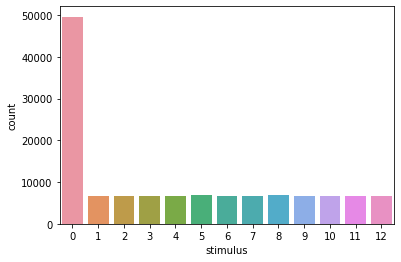

In [ ]:
sns.countplot(x = 'stimulus', data=df)
df.loc[:,'stimulus'].value_counts()

---
Visualize Data Disturbutions


In [ ]:
# #distribution of first 19 features


# fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(40, 40))
# axs = axs.flatten()
# index = 0
# for k, v in df.items():
#   print(f"[{index +1}] Updating plot")
#   sns.distplot(v, ax=axs[index])
#   index += 1
#   if index == 20:
#     break 
# plt.tight_layout()


In [ ]:
X = df.iloc[:,1:].values
y = df.iloc[:, 0:1].values
print(X.shape, type(X), y.shape, type(y))
print()

# Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

print(f"X_train size: {len(X_train)} | X_val size: {len(X_val)} | X_test size: {len(X_test)}")
print(f"y_train size: {len(y_train)} | y_val size: {len(y_val)} | y_test size: {len(y_test)}")
print()
print(f"Training Feature Split: {X_train.shape} | Training Labels { y_train.shape}")
print(f"Validation Feature Split: {X_val.shape} | Validation Labels { y_val.shape}")
print(f"Testing Feature Split: {X_test.shape} | Testing Labels { y_test.shape}")
print()

#Normalization Data 
Minmax = preprocessing.MinMaxScaler()
#Standardized = preprocessing.StandardScaler()
X_train_Minmax= Minmax.fit_transform(X_train)
X_val_Minmax = Minmax.transform(X_val)
X_test_Minmax = Minmax.transform(X_test)

#Convert to numpy then to torch 

X_train = torch.from_numpy(X_train_Minmax).float()
y_train = torch.from_numpy(y_train).float()

X_val = torch.from_numpy(X_val_Minmax).float()
y_val = torch.from_numpy(y_val).float()

X_test = torch.from_numpy(X_test_Minmax).float()
y_test = torch.from_numpy(y_test).float()

print(f"X_train: {type(X_train)} | y_train {type(y_train)}")
print(f"X_val: {type(X_val)} | y_train {type(y_val)}")
print(f"X_test: {type(X_test)} | y_test {type(y_test)}")
print()
print(f"Training: {X_train.shape} , { y_train.shape}")
print(f"Validation: {X_val.shape} , { y_val.shape}")
print(f"Testing:  {X_test.shape} , { y_test.shape}")

(130200, 19) <class 'numpy.ndarray'> (130200, 1) <class 'numpy.ndarray'>

X_train size: 78120 | X_val size: 26040 | X_test size: 26040
y_train size: 78120 | y_val size: 26040 | y_test size: 26040

Training Feature Split: (78120, 19) | Training Labels (78120, 1)
Validation Feature Split: (26040, 19) | Validation Labels (26040, 1)
Testing Feature Split: (26040, 19) | Testing Labels (26040, 1)

X_train: <class 'torch.Tensor'> | y_train <class 'torch.Tensor'>
X_val: <class 'torch.Tensor'> | y_train <class 'torch.Tensor'>
X_test: <class 'torch.Tensor'> | y_test <class 'torch.Tensor'>

Training: torch.Size([78120, 19]) , torch.Size([78120, 1])
Validation: torch.Size([26040, 19]) , torch.Size([26040, 1])
Testing:  torch.Size([26040, 19]) , torch.Size([26040, 1])


In [ ]:
class ClassifierDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data

    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]

    def __len__ (self):
        return len(self.X_data)

training = ClassifierDataset(X_train, y_train)
validating = ClassifierDataset(X_val, y_val)
testing = ClassifierDataset(X_test, y_test)

##########################################################################################################################################################################################################
#############################################################################################################################################################################################################

#Hyperparameters
latent_dim = 2
input_dim= 19
hidden_dim= 9
output_dim = 19
num_classes = 13

num_epochs= 100
batch_size= 100
learning_rate= 0.0001 #3e-4 #Karpathy constant


#beta = 1
beta = 0.001
alpha = 1

#############################################################################################################################################################################################################
#############################################################################################################################################################################################################

train_loader = DataLoader(training, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(validating, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(testing, batch_size=batch_size, shuffle=False)


In [ ]:
class VAE(nn.Module):  
  def __init__(self, input_dim, hidden_dim, latent_dim):
    super(VAE,self).__init__()  
    self.fc1 = nn.Linear(input_dim, hidden_dim)  # no labels
    self.mu = nn.Linear(hidden_dim, latent_dim)   # mu
    self.logvar = nn.Linear(hidden_dim,latent_dim)   # log-var

    self.fc3 = nn.Linear(latent_dim, hidden_dim) 
    self.fc4 = nn.Linear(hidden_dim, input_dim)
    
    self.classifier = nn.Sequential(
        nn.Linear(latent_dim, 13),
        nn.Sigmoid(),
        nn.Softmax(dim=1)
    )

  def encode(self, x):     
#    print(f'encoder {type(x)}')         
    z = F.relu(self.fc1(x))
    z = torch.tanh(z) 
    z1 = self.mu(z)               
    z2 = self.logvar(z) 
    return z1, z2                 # (mu, log-var)

  def decode(self, x):
#    print(f'decoder {type(x)}')
    z = F.relu(self.fc3(x))                    
    z = torch.sigmoid(self.fc4(z))      # in [0, 1]
    #print(f"z: {z}")
    return z 

  def forward(self, x):
#    print(f'forward {type(x)}')

#  Reparamaterize
    mu, logvar = self.encode(x)
    stdev = torch.exp(0.5 * logvar)
    esp = torch.randn_like(stdev)
    z_reparmeterized = mu + (esp * stdev)   
    #print(f"z_reparmeterized : {z_reparmeterized}")      
    x_reconstructed = self.decode(z_reparmeterized)
    #print(f"x_reconstructed : {x_reconstructed}")

    classified = self.classifier(z_reparmeterized)

    return (x_reconstructed, z_reparmeterized, classified, mu, logvar)

if __name__ == "__main__":
  x = torch.rand(batch_size,input_dim)
  vae = VAE(input_dim, hidden_dim, latent_dim)
  x_reconstructed, z_reparmeterized, classified, mu, logvar = vae(x)
  print(x_reconstructed.shape)
  print(mu.shape)
  print(logvar.shape)
  print(z_reparmeterized.shape)
  print(classified.shape)


torch.Size([100, 19])
torch.Size([100, 2])
torch.Size([100, 2])
torch.Size([100, 2])
torch.Size([100, 13])


In [ ]:
model  = VAE(input_dim, hidden_dim, latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

print(model)
loss_fn = nn.MSELoss(reduction="sum")
classifier_loss_fn = nn.CrossEntropyLoss()

def accuracy(y_pred, y_act):
  y_pred = torch.round(y_pred)
  correct = (y_pred == y_act)
  acc1 = correct.sum()/len(correct)
  acc2 = torch.round(acc1*100)
  # print(f"z_pred: {y_pred} | lable: {y_act} | correct: {correct} | accuracy {acc1} | accuracy {acc2}")
  return acc2

VAE(
  (fc1): Linear(in_features=19, out_features=9, bias=True)
  (mu): Linear(in_features=9, out_features=2, bias=True)
  (logvar): Linear(in_features=9, out_features=2, bias=True)
  (fc3): Linear(in_features=2, out_features=9, bias=True)
  (fc4): Linear(in_features=9, out_features=19, bias=True)
  (classifier): Sequential(
    (0): Linear(in_features=2, out_features=13, bias=True)
    (1): Sigmoid()
    (2): Softmax(dim=1)
  )
)


In [ ]:
train_losses=[]
val_losses=[]
train_accuracy = []
val_accuracy = []


dic = dict(latent_space = list(), mu_list=list(), logsig2_list=list(), y=list())
for epoch in range(num_epochs):
  model.train()
  #print(f"zvalue loop begin {z}")
  train_running_loss = 0
  train_running_acc = 0
#  loop = tqdm(train_loader)
  for i, data in enumerate(train_loader):
    inputs, labels = data
    #print(f'type data: {type(data)}')
    #print(f'type inputs: {type(inputs)}')
    #print(f'type labels: {type(labels)}')

    x_reconstructed, z_reparmeterized, classified, mu, logvar = model(inputs)
    #print(x_reconstructed, type(x_reconstructed))
    #print(mu, type(mu))
    #print(logvar, type(logvar))

    reconstruction_loss = loss_fn(x_reconstructed, inputs)
    kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    loss = alpha*reconstruction_loss + kld_loss*beta

    acc_train = accuracy(classified, labels)
    #print(reconstruction_loss, kld_loss, loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_running_loss += loss.item()
    train_loss= train_running_loss/len(train_loader)

    train_running_acc += acc_train.item()
    train_acc = train_running_acc/len(train_loader)

  
  z_list, means, logvars , labels = list(), list(), list(), list()

  #Evaluation
  with torch.inference_mode():
    val_running_loss = 0

    model.eval()
    for X, Y in val_loader:
      #print(labels)
      #inputs = torch.autograd.Variable(inputs)
      y_pred, z_reparmeterized, classified, mu, logvar = model(X)
      v_reconstruction_loss = loss_fn(y_pred, X)
      v_kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
      vloss = alpha*v_reconstruction_loss + v_kld_loss*beta
      #print(v_reconstruction_loss, v_kld_loss, vloss)

      # yhat = torch.max(z.data,1)
      # correct+=(yhat==y_test).sum().int()
      # accuracy = correct / n_test
      # accuracy_list.append(accuracy)
  

      # val_acc = accuracy(classified, labels)
      val_acc = 0

      val_running_loss += vloss.item()
      val_loss = val_running_loss/len(val_loader)

      # log ...
      z_list.append(z_reparmeterized.detach())
      means.append(mu.detach())
      logvars.append(logvar.detach())
      labels.append(Y.detach())

  dic['latent_space'].append(torch.cat(z_list))
  dic['mu_list'].append(torch.cat(means))
  dic['logsig2_list'].append(torch.cat(logvars))
  dic['y'].append(torch.cat(labels))

  print(f"Epoch: {epoch+1}/{num_epochs} | reconst_loss: {reconstruction_loss:.3f} | kldiv loss: {kld_loss:.5f} | total loss: {train_loss:.3f} | train acc: {train_acc:.3f} ||| Val Loss: {val_loss:.3f} | val acc: {val_acc:.3f}")
  print("--------------------------------------------------------------------------------------------------------------------------------------------------------------")
  #print(f"Epoch: {epoch+1} / {num_epochs} | reconst_loss: {v_reconstruction_loss:.3f} | kldiv loss: {v_kld_loss:.3f} | Val Loss: {val_loss:.3f}")
  train_losses.append(train_loss)
  val_losses.append(val_loss)
  train_accuracy.append(train_acc)
  



Epoch: 1 / 200 | reconst_loss: 3.104 | kldiv loss: 8.09943 | total loss: 24.054 | train acc: 495.662 ||| Val Loss: 16.296 | val acc: 0.000
------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 200 | reconst_loss: 1.574 | kldiv loss: 24.58802 | total loss: 12.769 | train acc: 495.662 ||| Val Loss: 10.124 | val acc: 0.000
------------------------------------------------------------------------------------------------------------------
Epoch: 3 / 200 | reconst_loss: 0.801 | kldiv loss: 45.93206 | total loss: 8.234 | train acc: 495.463 ||| Val Loss: 6.572 | val acc: 0.000
------------------------------------------------------------------------------------------------------------------
Epoch: 4 / 200 | reconst_loss: 0.830 | kldiv loss: 72.12294 | total loss: 5.349 | train acc: 495.529 ||| Val Loss: 4.502 | val acc: 0.000
----------------------------------------------------------------------------------------------------

In [ ]:
torch.save(model.state_dict(), 'VAE_Model.pt') # Save

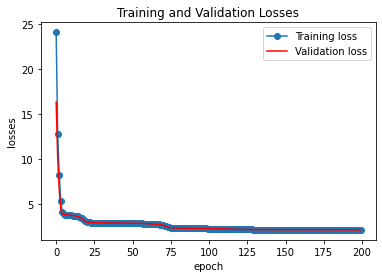

In [ ]:
plt.plot(train_losses,'-o', label="Training loss")
plt.plot(val_losses,'-r',  label="Validation loss")
plt.xlabel('epoch')
plt.ylabel('losses')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

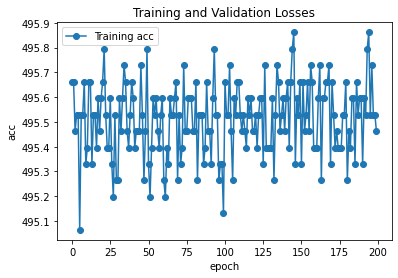

In [ ]:
plt.plot(train_accuracy,'-o', label="Training acc")
# plt.plot(val_acc,'-r',  label="Validation acc")
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

In [ ]:
print("Latent Space Visualization")
for i in range (num_epochs):
  fig = plt.figure(figsize=(10,10))
  z_arr = dic['latent_space'][i].cpu().numpy()
  y_arr = dic['y'][i].cpu().numpy()

  #Experiment 1
  plt.scatter(z_arr[:,0], z_arr[:,1], c = y_arr, edgecolor='none', alpha=0.5,
              cmap=plt.cm.get_cmap('hsv', 13))
  cb = plt.colorbar(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12],values=[0,1,2,3,4,5,6,7,8,9,10,11,12])

  #Experiment 3
  # plt.scatter(z_arr[:,0], z_arr[:,1], c = y_arr, edgecolor='none', alpha=0.5,
  #             cmap=plt.cm.get_cmap('hsv', 23))
  #cb = plt.colorbar(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],values=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
  
  cb.ax.tick_params(labelsize=10)
  plt.xticks(fontsize= 10)
  plt.yticks(fontsize= 10)
  plt.xlabel('z[0]', fontsize= 10)
  plt.ylabel('z[1]', fontsize= 10)
  plt.title(f'VAE train dataset with latent space Dim=2  Epoch number: {i+1} ', fontsize= 12)
  # plt.show()
  plt.close()
  fig.savefig(f"/content/drive/MyDrive/WEAR_LAB/Research_Pytorch/VAE_Images/VAEtrain_images{i:001}" + ".png")
  print(f"Latent Space Image {i+1} stored.")

import imageio
gif = []
for i in range(num_epochs):
  each_image = imageio.imread(f"/content/drive/MyDrive/WEAR_LAB/Research_Pytorch/VAE_Images/VAEtrain_images{i}" + ".png")# here read all images
  gif.append(each_image)
imageio.mimsave("/content/result.gif",gif)

from IPython.display import Image

fname = '/content/result.gif'
Image(open(fname, 'rb').read())  # local

Latent Space Visualization
Latent Space Image 1 stored.
Latent Space Image 2 stored.
Latent Space Image 3 stored.
Latent Space Image 4 stored.
Latent Space Image 5 stored.
Latent Space Image 6 stored.
Latent Space Image 7 stored.
Latent Space Image 8 stored.
Latent Space Image 9 stored.
Latent Space Image 10 stored.
Latent Space Image 11 stored.
Latent Space Image 12 stored.
Latent Space Image 13 stored.
Latent Space Image 14 stored.
Latent Space Image 15 stored.
Latent Space Image 16 stored.
Latent Space Image 17 stored.
Latent Space Image 18 stored.
Latent Space Image 19 stored.
Latent Space Image 20 stored.
Latent Space Image 21 stored.
Latent Space Image 22 stored.
Latent Space Image 23 stored.
Latent Space Image 24 stored.
Latent Space Image 25 stored.
Latent Space Image 26 stored.
Latent Space Image 27 stored.
Latent Space Image 28 stored.
Latent Space Image 29 stored.
Latent Space Image 30 stored.
Latent Space Image 31 stored.
Latent Space Image 32 stored.
Latent Space Image 33 

In [ ]:
# for i in range (num_epochs):
#   z_arr = dic['latent_space'][i].cpu().numpy()
#   y_arr = dic['y'][i].cpu().numpy()
#   plt.figure(figsize = (10,5))
#   plt.subplot(1,2,1)
#   plt.scatter(z_arr[:,0], z_arr[:,1], c = y_arr)
#   plt.colorbar()
#   plt.tight_layout()

---
VAE Experiment 1 **[]** 2/26
---

In [ ]:
import torch   
import torch.nn as nn                          
import torch.nn.functional as F                
import torch.optim as optim   
from torch.utils.data import TensorDataset, Dataset, DataLoader
from torch.autograd import Variable
import torch.utils.data

import pandas as pd 
import numpy as np
import os                             

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns    

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

import torchvision
from torchvision import datasets

#based on sensor data can you determine the stimulus that is currently in use?
import optuna

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/WEAR_LAB/Research_Pytorch/Subject_Experiment_1/S2_E1_A1.csv")
#drops all 0 labels (no label)
indices_to_drop = df[df["stimulus"] == 0].index
df.drop(indices_to_drop, inplace=True)

#Removes number of features from data
# df.drop('Cyber Glove (angles of the joints) Sensor 1', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 2', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 3', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 4', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 5', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 6', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 7', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 8', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 9', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 10', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 11', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 12', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 13', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 14', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 15', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 16', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 17', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 18', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 19', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 20', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 21', inplace=True, axis=1)
# df.drop('Cyber Glove (angles of the joints) Sensor 22', inplace=True, axis=1)

In [ ]:
df.head()

,stimulus,Acc 1,Acc 2,Acc 3,EMG Channel 1,EMG Channel 2,EMG Channel 3,EMG Channel 4,EMG Channel 5,EMG Channel 6,...,Cyber Glove (angles of the joints) Sensor 13,Cyber Glove (angles of the joints) Sensor 14,Cyber Glove (angles of the joints) Sensor 15,Cyber Glove (angles of the joints) Sensor 16,Cyber Glove (angles of the joints) Sensor 17,Cyber Glove (angles of the joints) Sensor 18,Cyber Glove (angles of the joints) Sensor 19,Cyber Glove (angles of the joints) Sensor 20,Cyber Glove (angles of the joints) Sensor 21,Cyber Glove (angles of the joints) Sensor 22
862,1,-0.03418,0.84131,-0.51855,0,-1,-1,0,0,0,...,67.71,-25.952,2.4988,49.344,63.171,-3.4729,15.409,21.185,-3.1765,13.553
863,1,-0.03418,0.84131,-0.51855,0,0,-2,-2,-2,0,...,67.71,-25.952,2.4988,49.344,63.171,-3.4729,15.409,21.185,-3.1765,13.553
864,1,-0.03418,0.84131,-0.51855,-1,0,-1,-2,-1,-2,...,67.71,-25.952,2.4988,49.344,63.171,-3.4729,15.409,21.185,-3.1765,13.553
865,1,-0.03418,0.84131,-0.51855,-4,-5,-5,-1,0,-1,...,67.71,-25.952,2.4988,49.344,63.171,-3.4729,15.409,21.185,-3.1765,13.553
866,1,-0.03418,0.84131,-0.51855,0,-2,-1,-1,-1,-1,...,67.71,-25.952,2.4988,49.344,63.171,-3.4729,15.409,21.185,-3.1765,13.553


In [ ]:
X = df.drop('stimulus', axis=1)
#y = df['stimulus']
y = df.iloc[:, 0:1]
print(X.shape, type(X), y.shape, type(y))
print()

(90015, 41) <class 'pandas.core.frame.DataFrame'> (90015, 1) <class 'pandas.core.frame.DataFrame'>



In [ ]:
X.head()

,Acc 1,Acc 2,Acc 3,EMG Channel 1,EMG Channel 2,EMG Channel 3,EMG Channel 4,EMG Channel 5,EMG Channel 6,EMG Channel 7,...,Cyber Glove (angles of the joints) Sensor 13,Cyber Glove (angles of the joints) Sensor 14,Cyber Glove (angles of the joints) Sensor 15,Cyber Glove (angles of the joints) Sensor 16,Cyber Glove (angles of the joints) Sensor 17,Cyber Glove (angles of the joints) Sensor 18,Cyber Glove (angles of the joints) Sensor 19,Cyber Glove (angles of the joints) Sensor 20,Cyber Glove (angles of the joints) Sensor 21,Cyber Glove (angles of the joints) Sensor 22
862,-0.03418,0.84131,-0.51855,0,-1,-1,0,0,0,-1,...,67.71,-25.952,2.4988,49.344,63.171,-3.4729,15.409,21.185,-3.1765,13.553
863,-0.03418,0.84131,-0.51855,0,0,-2,-2,-2,0,1,...,67.71,-25.952,2.4988,49.344,63.171,-3.4729,15.409,21.185,-3.1765,13.553
864,-0.03418,0.84131,-0.51855,-1,0,-1,-2,-1,-2,0,...,67.71,-25.952,2.4988,49.344,63.171,-3.4729,15.409,21.185,-3.1765,13.553
865,-0.03418,0.84131,-0.51855,-4,-5,-5,-1,0,-1,-1,...,67.71,-25.952,2.4988,49.344,63.171,-3.4729,15.409,21.185,-3.1765,13.553
866,-0.03418,0.84131,-0.51855,0,-2,-1,-1,-1,-1,-2,...,67.71,-25.952,2.4988,49.344,63.171,-3.4729,15.409,21.185,-3.1765,13.553


---
Visualization number of labels

stimulus
10          7931
6           7619
8           7580
7           7567
5           7564
11          7539
4           7473
3           7424
9           7397
12          7357
2           7329
1           7235
dtype: int64

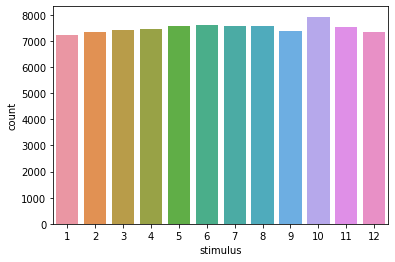

In [ ]:
sns.countplot(x = 'stimulus', data=df)
y.value_counts()

---
Fixing Data Imbalance via Undersampling

<AxesSubplot:xlabel='stimulus'>

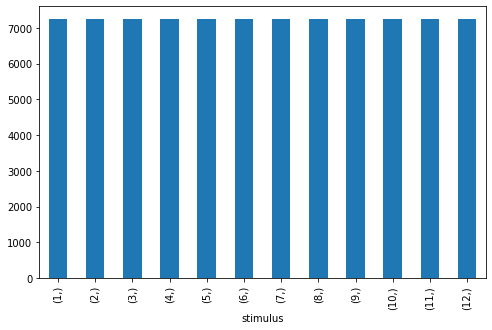

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

sampling_strategy = "not minority"
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(X, y)
y_res.value_counts().plot(kind='bar', figsize=(8,5))

In [ ]:
print(y_res.value_counts())
print(len(X_res.value_counts()))

stimulus
1           7235
2           7235
3           7235
4           7235
5           7235
6           7235
7           7235
8           7235
9           7235
10          7235
11          7235
12          7235
dtype: int64
86820


In [ ]:
print(y)

        stimulus
862            1
863            1
864            1
865            1
866            1
...          ...
148362        12
148363        12
148364        12
148365        12
148366        12

[90015 rows x 1 columns]


---
Visualization of Data Distributions

In [ ]:
# #distribution of first 19 features


# fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(40, 40))
# axs = axs.flatten()
# index = 0
# for k, v in df.items():
#   print(f"[{index +1}] Updating plot")
#   sns.distplot(v, ax=axs[index])
#   index += 1
#   if index == 20:
#     break 
# plt.tight_layout()

---
Defining Hyperparmaeters

In [ ]:
#############################################################################################################################################################################################################
#############################################################################################################################################################################################################
#############################################################################################################################################################################################################
#############################################################################################################################################################################################################

#Hyperparameters
emg_channels = 16
imu_channels = 3

latent_dim = 2
input_dim= len(X.columns)

hidden_dim= round(input_dim/2)
hidden_dim_2 = round(input_dim/4)
output_dim = len(X.columns)
num_classes = 12
num_layers = round(num_classes/2)
tempature = 1

num_epochs= 10
batch_size= 100
learning_rate= 0.001 #3e-4 #Karpathy constant
l2_lambda = 0


alpha = 2        # Reconstruction Loss
beta = 2         # Kl Divergence Loss
gamma = 3        # Classifcation Loss
delta = 5        # Contrastive Loss
epsilon = 3      # Triplet Loss

#############################################################################################################################################################################################################
#############################################################################################################################################################################################################
#############################################################################################################################################################################################################
#############################################################################################################################################################################################################

---
Train Test Split

In [ ]:
X = X_res.values
y = y_res.values
print(X.shape, type(X), y.shape, type(y))
print()

# Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

print(f"X_train size: {len(X_train)} | X_val size: {len(X_val)} | X_test size: {len(X_test)}")
print(f"y_train size: {len(y_train)} | y_val size: {len(y_val)} | y_test size: {len(y_test)}")
print()
print(f"Training Feature Split: {X_train.shape} | Training Labels { y_train.shape}")
print(f"Validation Feature Split: {X_val.shape} | Validation Labels { y_val.shape}")
print(f"Testing Feature Split: {X_test.shape} | Testing Labels { y_test.shape}")
print()

(86820, 41) <class 'numpy.ndarray'> (86820, 1) <class 'numpy.ndarray'>

X_train size: 52092 | X_val size: 17364 | X_test size: 17364
y_train size: 52092 | y_val size: 17364 | y_test size: 17364

Training Feature Split: (52092, 41) | Training Labels (52092, 1)
Validation Feature Split: (17364, 41) | Validation Labels (17364, 1)
Testing Feature Split: (17364, 41) | Testing Labels (17364, 1)



---
Scaling/Normalizing Data

In [ ]:
#Normalization Data 

#No Normalization 
# X_train_Normalized = X_train
# X_val_Normalized = X_val
# X_test_Normalized = X_test
#----------------------------------------------------------------------------------------------------------
# Minmax without preprocessing
# Minmax = preprocessing.MinMaxScaler()
# X_train_Normalized= Minmax.fit_transform(X_train)
# X_val_Normalized = Minmax.transform(X_val)
# X_test_Normalized = Minmax.transform(X_test)
#----------------------------------------------------------------------------------------------------------
# Minmax with preprocessing
# Minmax = preprocessing.MinMaxScaler()
# X_train_Normalized= Minmax.fit_transform(X_train_preprocessed)
# X_val_Normalized = Minmax.transform(X_val_preprocessed)
# X_test_Normalized = Minmax.transform(X_test_preprocessed)

#----------------------------------------------------------------------------------------------------------
# # Standardization without preprocessing
Standardized = preprocessing.StandardScaler()
X_train_Normalized= Standardized.fit_transform(X_train)
X_val_Normalized = Standardized.transform(X_val)
X_test_Normalized = Standardized.transform(X_test)

# Standardization with preprocessing
# Standardized = preprocessing.StandardScaler()
# X_train_Normalized= Standardized.fit_transform(X_train_preprocessed)
# X_val_Normalized = Standardized.transform(X_val_preprocessed)
# X_test_Normalized = Standardized.transform(X_test_preprocessed)
#----------------------------------------------------------------------------------------------------------

#Convert to numpy then to torch 

X_train = torch.from_numpy(X_train_Normalized).float()
y_train = torch.from_numpy(y_train).long()

X_val = torch.from_numpy(X_val_Normalized).float()
y_val = torch.from_numpy(y_val).long()

X_test = torch.from_numpy(X_test_Normalized).float()
y_test = torch.from_numpy(y_test).long()

print(f"X_train: {type(X_train)} | y_train {type(y_train)}")
print(f"X_val: {type(X_val)} | y_train {type(y_val)}")
print(f"X_test: {type(X_test)} | y_test {type(y_test)}")
print()
print(f"Training: {X_train.shape} , { y_train.shape}")
print(f"Validation: {X_val.shape} , { y_val.shape}")
print(f"Testing:  {X_test.shape} , { y_test.shape}")

X_train: <class 'torch.Tensor'> | y_train <class 'torch.Tensor'>
X_val: <class 'torch.Tensor'> | y_train <class 'torch.Tensor'>
X_test: <class 'torch.Tensor'> | y_test <class 'torch.Tensor'>

Training: torch.Size([52092, 41]) , torch.Size([52092, 1])
Validation: torch.Size([17364, 41]) , torch.Size([17364, 1])
Testing:  torch.Size([17364, 41]) , torch.Size([17364, 1])


---
Defining Dataloaders


In [ ]:
class ClassifierDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data

    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]

    def __len__ (self):
        return len(self.X_data)

In [ ]:
training = ClassifierDataset(X_train, y_train)
validating = ClassifierDataset(X_val, y_val)
testing = ClassifierDataset(X_test, y_test)


train_loader = DataLoader(training, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(validating, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(testing, batch_size=batch_size, shuffle=False)

def get_data_loader(optuna_batch_size):
  train_loader = DataLoader(training, batch_size=optuna_batch_size, shuffle=True)
  val_loader = DataLoader(validating, batch_size=optuna_batch_size, shuffle=False)
  test_loader = DataLoader(testing, batch_size=optuna_batch_size, shuffle=False)
  return train_loader, val_loader, test_loader

---
Defining VAE Model, Loss and Optmizers

In [ ]:
class VAE(nn.Module):  
  def __init__(self, input_dim, hidden_dim, latent_dim):
    super(VAE,self).__init__()  
    self.encoder = nn.Sequential(
        nn.Linear(input_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim_2),
        nn.ReLU(),
        nn.Linear(hidden_dim_2, hidden_dim_2),
        nn.ReLU(),
        nn.Linear(hidden_dim_2, hidden_dim_2),
    )
    self.mu = nn.Linear(hidden_dim_2, latent_dim)   # mu
    self.logvar = nn.Linear(hidden_dim_2, latent_dim)   # log-var
    self.decoder = nn.Sequential(
        nn.Linear(latent_dim, hidden_dim_2),
        nn.ReLU(),
        nn.Linear(hidden_dim_2, hidden_dim_2),
        nn.ReLU(),
        nn.Linear(hidden_dim_2, hidden_dim_2),
        nn.ReLU(),
        nn.Linear(hidden_dim_2, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, input_dim),
    )
    self.classifier = nn.Sequential(
        nn.Linear(latent_dim, num_layers),
        nn.ReLU(),
        nn.Linear(num_layers, 13),
        nn.Softmax(dim=1)
    )

  def encode(self, x):  
    z = self.encoder(x)
    z1 = self.mu(z)               
    z2 = self.logvar(z) 
    return z1, z2                 # (mu, log-var)

  def decode(self, x):

    return self.decoder(x)

  def forward(self, x):
#  Reparamaterize
    mu, logvar = self.encode(x)
    stdev = torch.exp(0.5 * logvar)
    esp = torch.randn_like(stdev)
    z_reparmeterized = mu + (esp * stdev)   

    x_reconstructed = self.decode(z_reparmeterized)
    classified = self.classifier(z_reparmeterized)
    classified = classified / tempature

    return (x_reconstructed, z_reparmeterized, classified, mu, logvar)

if __name__ == "__main__":
  x = torch.rand(batch_size,input_dim)
  vae = VAE(input_dim, hidden_dim, latent_dim)
  x_reconstructed, z_reparmeterized, classified, mu, logvar = vae(x)
  print(f"Reconstruction X: {x_reconstructed.shape}")

  print(f"Mu: {mu.shape} ")
  
  print(f"Logvar: {logvar.shape}")
 
  print(f"Latent Space Z: {z_reparmeterized.shape}")
 
  print(f"Classifier: {classified.shape}")

Reconstruction X: torch.Size([100, 41])
Mu: torch.Size([100, 2]) 
Logvar: torch.Size([100, 2])
Latent Space Z: torch.Size([100, 2])
Classifier: torch.Size([100, 13])


In [ ]:
class ContrastiveLoss(nn.Module):
  def __init__(self, margin=1.0):
    super(ContrastiveLoss, self).__init__()
    self.margin = margin
        
  def forward(self, z_reparmeterized, labels):
    # Compute the pairwise euclidean distances between the examples in the latent space
    distances = torch.pow(z_reparmeterized, 2).sum(dim=1, keepdim=True) + torch.pow(z_reparmeterized, 2).sum(dim=1, keepdim=True).t() - 2 * torch.matmul(z_reparmeterized, z_reparmeterized.t())
    # Create a mask for the positive pairs (i.e. examples with the same label)
    positive_mask = labels.expand(z_reparmeterized.size(0), z_reparmeterized.size(0)).eq(labels.expand(z_reparmeterized.size(0), z_reparmeterized.size(0)).t())
    # Create a mask for the negative pairs (i.e. examples with different labels)
    negative_mask = labels.expand(z_reparmeterized.size(0), z_reparmeterized.size(0)).ne(labels.expand(z_reparmeterized.size(0), z_reparmeterized.size(0)).t())
    # Set the distances for the positive pairs to a large value
    distances.masked_fill_(positive_mask, 1e7)
    # Compute the contrastive loss as the sum of the max(0, margin - distance) for the negative pairs
    contrastive_loss = torch.sum(torch.max(torch.zeros_like(distances), self.margin - distances))
    return contrastive_loss

In [ ]:
def train_VAE(model, train_loader, val_loader, optimizer, epoch,alpha,beta,gamma, delta):
  train_losses=[]
  train_accuracy = []
  accuracy_log = []
  val_losses=[]
  val_accuracy=[]

  recon_loss_fn = nn.MSELoss(reduction="sum")
  classifier_loss_fn = nn.CrossEntropyLoss()
  contrastive_loss_fn = ContrastiveLoss(margin=1)

  train_running_loss = 0
  model.train()
  for i, data in enumerate(train_loader):
    inputs, labels = data
    # print(f"Input shape: {inputs.shape}")
    # print(f"Labels shape: {labels.shape}")
    optimizer.zero_grad()
    
    x_reconstructed, z_reparmeterized, classified, mu, logvar = model(inputs)

    # Compute the reconstruction loss and KL divergence loss #################################################

    reconstruction_loss = recon_loss_fn(x_reconstructed, inputs)
    kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    contrastive_loss = contrastive_loss_fn(mu, labels)

    # Compute the classificaiton loss #########################################################################
    classified = classified.view(-1, 13)
    classification_loss = classifier_loss_fn(classified, labels.flatten())

  
    loss = (alpha*reconstruction_loss + kld_loss*beta) + gamma*classification_loss + (delta*contrastive_loss)

    accuracy = accuracy_score(labels, classified.argmax(dim=1))
    train_accuracy.append(accuracy)
    train_acc = sum(train_accuracy)/len(train_accuracy)
    accuracy_log.append(train_acc)

    loss.backward()
    optimizer.step()

    train_running_loss += loss.item()
    train_loss= train_running_loss/len(train_loader)

  with torch.inference_mode():
    val_running_loss = 0
    val_running_acc = 0

    model.eval()
    # Iterate over the validation data
    for X, Y in val_loader:
      # Pass the data through the model and get the reconstructed data and the latent representation
      y_pred, z_reparmeterized, v_classified, mu, logvar = model(X)

      # Compute the reconstruction loss
      v_reconstruction_loss = recon_loss_fn(y_pred, X)

      # Compute the KL divergence loss
      v_kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

      v_contrastive_loss_value = contrastive_loss_fn(mu, Y)

      # Reshape the classified output to have the same shape as the labels
      v_classified = v_classified.view(-1, 13)
      # Compute the classification loss
      v_classification_loss = classifier_loss_fn(v_classified, Y.flatten())

      # Compute the total loss
      vloss = (alpha*v_reconstruction_loss + v_kld_loss*beta) + gamma*v_classification_loss + delta*v_contrastive_loss_value
      val_running_loss += vloss.item()
      val_loss = val_running_loss/len(val_loader)

      v_accuracy = accuracy_score(Y, v_classified.argmax(dim=1))
      val_accuracy.append(v_accuracy)
      val_acc = sum(val_accuracy)/len(val_accuracy)

  print(f"Epoch: {epoch+1} / {num_epochs} | Reconst_loss: {reconstruction_loss:.3f} | Kldiv loss: {kld_loss:.3f} | Classifcation loss: {classification_loss:.3f} | Constrast loss: {contrastive_loss:.2f} | Total loss: {train_loss:.3f} | Train acc: {train_acc*100:.3f} % ||| Val Loss: {val_loss:.3f} | Val acc: {val_acc*100:.3f} %")
  print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
  train_losses.append(train_loss)
  val_losses.append(val_loss)

  return train_losses, val_losses, train_acc, val_acc



In [ ]:
def objective(trial):
  params = {
          'optuna_batch_size' : trial.suggest_int('optuna_batch_size', 1e1, 1e3),
          'num_epochs' : num_epochs,
          'optimizer': trial.suggest_categorical("optimizer", ["Adam", "RMSprop"]),
          "lr": trial.suggest_float('lr', 1e-4, 1e-2),
          'alpha': trial.suggest_float('alpha', 1e-1, 1e1),
          'beta': trial.suggest_float('beta', 1e-1, 1e1), 
          'gamma': trial.suggest_float('gamma', 1e-1, 1e1), 
          'delta': trial.suggest_float('delta', 1e-1, 1e1),        
  }

  train_loader, val_loader, test_loader = get_data_loader(params['optuna_batch_size'])
  model  = VAE(input_dim, hidden_dim, latent_dim).to(device)
  optimizer = getattr(optim, params['optimizer'])(model.parameters(), lr=params['lr'])

  for epoch in range(params['num_epochs']):
    train_losses, val_losses, train_acc, val_acc = train_VAE(model, train_loader, val_loader, optimizer, epoch, alpha, beta, gamma, delta)
  return train_acc


In [ ]:
sampler = optuna.samplers.TPESampler()    
study = optuna.create_study(
    sampler=sampler,
    pruner=optuna.pruners.MedianPruner(
        n_startup_trials=3, n_warmup_steps=5, interval_steps=3
    ),
    direction='maximize')
study.optimize(func=objective, n_trials=100)

[I 2023-02-27 04:55:43,192] A new study created in memory with name: no-name-e9316b28-db1a-4c9a-b673-bbb717e8cb14


Epoch: 1 / 10 | Reconst_loss: 3346.966 | Kldiv loss: 943.055 | Classifcation loss: 2.294 | Constrast loss: 54.79 | Total loss: 207895.909 | Train acc: 25.821 % ||| Val Loss: 85180.185 | Val acc: 36.129 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2528.846 | Kldiv loss: 900.897 | Classifcation loss: 2.352 | Constrast loss: 19.47 | Total loss: 81743.639 | Train acc: 39.079 % ||| Val Loss: 74129.552 | Val acc: 43.167 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 3 / 10 | Reconst_loss: 2553.695 | Kldiv loss: 823.871 | Classifcation loss: 2.239 | Constrast loss: 23.54 | Total loss: 73460.284 | Train acc: 44.787 % ||| Val Loss: 69777.155 | Val acc: 47.449 %
--------------------------

[I 2023-02-27 04:56:06,155] Trial 0 finished with value: 0.6206991811354621 and parameters: {'optuna_batch_size': 743, 'optimizer': 'RMSprop', 'lr': 0.007044878226407033, 'alpha': 3.2162710834834574, 'beta': 3.1628201715005972, 'gamma': 7.745098714381568, 'delta': 4.123415553751628}. Best is trial 0 with value: 0.6206991811354621.


Epoch: 10 / 10 | Reconst_loss: 2951.441 | Kldiv loss: 537.276 | Classifcation loss: 2.159 | Constrast loss: 15.37 | Total loss: 57427.092 | Train acc: 62.070 % ||| Val Loss: 56201.293 | Val acc: 61.167 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 2853.344 | Kldiv loss: 469.476 | Classifcation loss: 2.178 | Constrast loss: 79.01 | Total loss: 12205.449 | Train acc: 37.805 % ||| Val Loss: 9596.018 | Val acc: 49.818 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1793.348 | Kldiv loss: 361.833 | Classifcation loss: 2.142 | Constrast loss: 67.44 | Total loss: 9638.078 | Train acc: 51.037 % ||| Val Loss: 8847.482 | Val acc: 56.197 %
-----------------------------

[I 2023-02-27 04:56:37,714] Trial 1 finished with value: 0.6122965641952984 and parameters: {'optuna_batch_size': 132, 'optimizer': 'RMSprop', 'lr': 0.009491602538775758, 'alpha': 3.909100924977496, 'beta': 1.0316845120419385, 'gamma': 3.5408275409935115, 'delta': 8.452433881636516}. Best is trial 0 with value: 0.6206991811354621.


Epoch: 10 / 10 | Reconst_loss: 1970.556 | Kldiv loss: 488.467 | Classifcation loss: 1.994 | Constrast loss: 12.89 | Total loss: 8227.093 | Train acc: 61.230 % ||| Val Loss: 7885.730 | Val acc: 61.621 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 3323.617 | Kldiv loss: 2702.077 | Classifcation loss: 2.544 | Constrast loss: 519.70 | Total loss: 530152.815 | Train acc: 10.708 % ||| Val Loss: 129560.428 | Val acc: 14.947 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 3279.776 | Kldiv loss: 2313.531 | Classifcation loss: 2.533 | Constrast loss: 118.24 | Total loss: 112796.553 | Train acc: 15.015 % ||| Val Loss: 75294.716 | Val acc: 14.312 %
---------------------

[I 2023-02-27 04:56:59,125] Trial 2 finished with value: 0.6532950327487305 and parameters: {'optuna_batch_size': 553, 'optimizer': 'Adam', 'lr': 0.0026636660004030074, 'alpha': 0.6751162450804987, 'beta': 3.385299775999059, 'gamma': 9.892900229613428, 'delta': 9.485558049627901}. Best is trial 2 with value: 0.6532950327487305.


Epoch: 10 / 10 | Reconst_loss: 2974.415 | Kldiv loss: 1057.752 | Classifcation loss: 2.086 | Constrast loss: 54.09 | Total loss: 43791.341 | Train acc: 65.330 % ||| Val Loss: 42943.343 | Val acc: 66.328 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 6955.964 | Kldiv loss: 2542.064 | Classifcation loss: 2.347 | Constrast loss: 215.87 | Total loss: 296739.193 | Train acc: 24.584 % ||| Val Loss: 95653.852 | Val acc: 36.177 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 6289.326 | Kldiv loss: 1761.964 | Classifcation loss: 2.298 | Constrast loss: 151.73 | Total loss: 92752.830 | Train acc: 39.853 % ||| Val Loss: 83228.202 | Val acc: 44.775 %
--------------------

[I 2023-02-27 04:57:21,060] Trial 3 finished with value: 0.4908862594390505 and parameters: {'optuna_batch_size': 824, 'optimizer': 'RMSprop', 'lr': 0.009709010774104979, 'alpha': 3.390768343889916, 'beta': 9.593216992828463, 'gamma': 5.31952440654823, 'delta': 8.539225040482275}. Best is trial 2 with value: 0.6532950327487305.


Epoch: 10 / 10 | Reconst_loss: 5205.827 | Kldiv loss: 1374.565 | Classifcation loss: 2.233 | Constrast loss: 52.92 | Total loss: 68049.330 | Train acc: 49.089 % ||| Val Loss: 62941.858 | Val acc: 49.639 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 835.096 | Kldiv loss: 165.276 | Classifcation loss: 2.050 | Constrast loss: 2.60 | Total loss: 6407.062 | Train acc: 37.444 % ||| Val Loss: 5460.110 | Val acc: 49.637 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 778.671 | Kldiv loss: 127.720 | Classifcation loss: 2.169 | Constrast loss: 7.77 | Total loss: 5341.765 | Train acc: 55.776 % ||| Val Loss: 5248.198 | Val acc: 59.138 %
---------------------------------

[I 2023-02-27 04:58:04,991] Trial 4 finished with value: 0.6995341326701048 and parameters: {'optuna_batch_size': 79, 'optimizer': 'RMSprop', 'lr': 0.0037383955283961825, 'alpha': 4.815267307543385, 'beta': 9.67674005317561, 'gamma': 5.417006825232157, 'delta': 2.2007460761161273}. Best is trial 4 with value: 0.6995341326701048.


Epoch: 10 / 10 | Reconst_loss: 591.508 | Kldiv loss: 167.220 | Classifcation loss: 1.888 | Constrast loss: 6.28 | Total loss: 4472.249 | Train acc: 69.953 % ||| Val Loss: 4446.480 | Val acc: 70.314 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 2939.074 | Kldiv loss: 2205.238 | Classifcation loss: 2.466 | Constrast loss: 394.60 | Total loss: 114076.302 | Train acc: 14.327 % ||| Val Loss: 56714.247 | Val acc: 20.895 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 3338.325 | Kldiv loss: 992.810 | Classifcation loss: 2.397 | Constrast loss: 153.11 | Total loss: 52032.269 | Train acc: 27.477 % ||| Val Loss: 34790.629 | Val acc: 36.789 %
--------------------------

[I 2023-02-27 04:58:28,005] Trial 5 finished with value: 0.6906420859975907 and parameters: {'optuna_batch_size': 327, 'optimizer': 'Adam', 'lr': 0.0060571810422021975, 'alpha': 0.8469236419659504, 'beta': 6.14969027121666, 'gamma': 1.5226720949545016, 'delta': 1.5649722090851543}. Best is trial 4 with value: 0.6995341326701048.


Epoch: 10 / 10 | Reconst_loss: 2069.485 | Kldiv loss: 631.727 | Classifcation loss: 2.048 | Constrast loss: 44.23 | Total loss: 20954.097 | Train acc: 69.064 % ||| Val Loss: 20599.975 | Val acc: 69.177 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 10862.117 | Kldiv loss: 4084.169 | Classifcation loss: 2.389 | Constrast loss: 623.71 | Total loss: 267991.691 | Train acc: 23.349 % ||| Val Loss: 101393.208 | Val acc: 33.205 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 9932.187 | Kldiv loss: 2802.493 | Classifcation loss: 2.261 | Constrast loss: 353.29 | Total loss: 94587.722 | Train acc: 41.681 % ||| Val Loss: 84168.035 | Val acc: 45.560 %
-------------------

[I 2023-02-27 04:58:50,282] Trial 6 finished with value: 0.6310760629046062 and parameters: {'optuna_batch_size': 863, 'optimizer': 'RMSprop', 'lr': 0.008104382736509676, 'alpha': 0.19827390499842593, 'beta': 7.433612799850968, 'gamma': 9.503789443341585, 'delta': 0.7184508849712268}. Best is trial 4 with value: 0.6995341326701048.


Epoch: 10 / 10 | Reconst_loss: 8613.661 | Kldiv loss: 2180.601 | Classifcation loss: 2.045 | Constrast loss: 162.53 | Total loss: 69317.012 | Train acc: 63.108 % ||| Val Loss: 63419.848 | Val acc: 67.642 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 22762.275 | Kldiv loss: 16012.462 | Classifcation loss: 2.479 | Constrast loss: 4075.35 | Total loss: 599125.607 | Train acc: 13.524 % ||| Val Loss: 118309.754 | Val acc: 18.899 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 19728.000 | Kldiv loss: 7153.510 | Classifcation loss: 2.302 | Constrast loss: 2215.42 | Total loss: 93075.623 | Train acc: 31.541 % ||| Val Loss: 77915.806 | Val acc: 40.198 %
-------------

[I 2023-02-27 04:59:15,209] Trial 7 finished with value: 0.6055410951178668 and parameters: {'optuna_batch_size': 746, 'optimizer': 'Adam', 'lr': 0.009066990202001284, 'alpha': 7.163965699200228, 'beta': 5.648476722632847, 'gamma': 9.43029343943856, 'delta': 9.00299888468433}. Best is trial 4 with value: 0.6995341326701048.


Epoch: 10 / 10 | Reconst_loss: 15262.551 | Kldiv loss: 5515.735 | Classifcation loss: 2.111 | Constrast loss: 999.41 | Total loss: 58281.580 | Train acc: 60.554 % ||| Val Loss: 56154.877 | Val acc: 60.668 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 7075.258 | Kldiv loss: 1656.418 | Classifcation loss: 2.463 | Constrast loss: 506.92 | Total loss: 74334.404 | Train acc: 13.045 % ||| Val Loss: 24777.252 | Val acc: 23.371 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 6355.294 | Kldiv loss: 1565.356 | Classifcation loss: 2.285 | Constrast loss: 353.94 | Total loss: 22105.172 | Train acc: 40.290 % ||| Val Loss: 19925.975 | Val acc: 46.804 %
-------------------

[I 2023-02-27 04:59:40,394] Trial 8 finished with value: 0.7036271618198428 and parameters: {'optuna_batch_size': 262, 'optimizer': 'Adam', 'lr': 0.003606224568103176, 'alpha': 9.28638495530031, 'beta': 9.350961131733353, 'gamma': 3.8350716421937894, 'delta': 7.461047207784562}. Best is trial 8 with value: 0.7036271618198428.


Epoch: 10 / 10 | Reconst_loss: 5205.645 | Kldiv loss: 1266.856 | Classifcation loss: 1.955 | Constrast loss: 155.60 | Total loss: 16403.573 | Train acc: 70.363 % ||| Val Loss: 15938.411 | Val acc: 71.281 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 22676.359 | Kldiv loss: 3768.208 | Classifcation loss: 2.551 | Constrast loss: 65241.32 | Total loss: 3247826.187 | Train acc: 9.318 % ||| Val Loss: 1036020.307 | Val acc: 11.206 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 20650.312 | Kldiv loss: 28303.566 | Classifcation loss: 2.506 | Constrast loss: 12892.07 | Total loss: 555910.549 | Train acc: 13.006 % ||| Val Loss: 365502.760 | Val acc: 15.165 %
--------

[I 2023-02-27 05:00:07,538] Trial 9 finished with value: 0.32268788367545104 and parameters: {'optuna_batch_size': 991, 'optimizer': 'Adam', 'lr': 0.001429273119000515, 'alpha': 8.80619852346651, 'beta': 4.724615522414608, 'gamma': 6.910660787282006, 'delta': 4.769746152060371}. Best is trial 8 with value: 0.7036271618198428.


Epoch: 10 / 10 | Reconst_loss: 16560.703 | Kldiv loss: 9016.066 | Classifcation loss: 2.359 | Constrast loss: 2300.96 | Total loss: 125778.167 | Train acc: 32.269 % ||| Val Loss: 119955.056 | Val acc: 33.189 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 5557.098 | Kldiv loss: 9.207 | Classifcation loss: 2.564 | Constrast loss: 18477.36 | Total loss: 529974.985 | Train acc: 8.232 % ||| Val Loss: 512030.192 | Val acc: 8.401 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 5041.295 | Kldiv loss: 82.100 | Classifcation loss: 2.564 | Constrast loss: 7004.04 | Total loss: 350415.807 | Train acc: 8.650 % ||| Val Loss: 204946.454 | Val acc: 9.006 %
------------------

[I 2023-02-27 05:00:29,809] Trial 10 finished with value: 0.158119106367514 and parameters: {'optuna_batch_size': 333, 'optimizer': 'Adam', 'lr': 0.00015379999898672107, 'alpha': 9.79227806639333, 'beta': 7.939767486641814, 'gamma': 1.1140333127500925, 'delta': 7.235782514161249}. Best is trial 8 with value: 0.7036271618198428.


Epoch: 10 / 10 | Reconst_loss: 4908.529 | Kldiv loss: 2888.423 | Classifcation loss: 2.488 | Constrast loss: 978.93 | Total loss: 61959.242 | Train acc: 15.812 % ||| Val Loss: 60842.611 | Val acc: 15.829 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1080.243 | Kldiv loss: 186.056 | Classifcation loss: 2.277 | Constrast loss: 24.71 | Total loss: 3977.183 | Train acc: 40.995 % ||| Val Loss: 3388.941 | Val acc: 57.764 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 837.826 | Kldiv loss: 216.749 | Classifcation loss: 1.972 | Constrast loss: 7.02 | Total loss: 3304.544 | Train acc: 61.624 % ||| Val Loss: 3152.661 | Val acc: 66.233 %
------------------------------

[I 2023-02-27 05:01:34,871] Trial 11 finished with value: 0.7086864732074313 and parameters: {'optuna_batch_size': 52, 'optimizer': 'RMSprop', 'lr': 0.0038623416470803065, 'alpha': 6.348718998181586, 'beta': 9.830274382925392, 'gamma': 4.031997371774362, 'delta': 6.459866630196646}. Best is trial 11 with value: 0.7086864732074313.


Epoch: 10 / 10 | Reconst_loss: 595.043 | Kldiv loss: 171.026 | Classifcation loss: 2.001 | Constrast loss: 13.00 | Total loss: 2843.332 | Train acc: 70.869 % ||| Val Loss: 2806.323 | Val acc: 70.864 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1449.120 | Kldiv loss: 302.220 | Classifcation loss: 2.425 | Constrast loss: 18.98 | Total loss: 53486.998 | Train acc: 16.863 % ||| Val Loss: 20699.209 | Val acc: 30.213 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 980.810 | Kldiv loss: 222.487 | Classifcation loss: 2.212 | Constrast loss: 5.34 | Total loss: 18613.379 | Train acc: 48.229 % ||| Val Loss: 17118.854 | Val acc: 53.519 %
-------------------------------

[I 2023-02-27 05:01:59,019] Trial 12 finished with value: 0.613801407771425 and parameters: {'optuna_batch_size': 241, 'optimizer': 'Adam', 'lr': 0.004293815734801606, 'alpha': 7.247937357584653, 'beta': 9.672335315193042, 'gamma': 3.5018160397344236, 'delta': 6.80540134543722}. Best is trial 11 with value: 0.7086864732074313.


Epoch: 10 / 10 | Reconst_loss: 860.539 | Kldiv loss: 237.017 | Classifcation loss: 2.037 | Constrast loss: 3.01 | Total loss: 14603.813 | Train acc: 61.380 % ||| Val Loss: 14475.342 | Val acc: 62.126 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 65.930 | Kldiv loss: 6.069 | Classifcation loss: 2.562 | Constrast loss: 0.00 | Total loss: 677.830 | Train acc: 46.706 % ||| Val Loss: 599.991 | Val acc: 58.244 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 42.027 | Kldiv loss: 8.606 | Classifcation loss: 1.690 | Constrast loss: 0.00 | Total loss: 589.118 | Train acc: 57.536 % ||| Val Loss: 712.900 | Val acc: 41.376 %
----------------------------------------------

[I 2023-02-27 05:07:20,320] Trial 13 finished with value: 0.5351631477927036 and parameters: {'optuna_batch_size': 10, 'optimizer': 'RMSprop', 'lr': 0.0053620127698157695, 'alpha': 7.12734713071115, 'beta': 8.135677684971698, 'gamma': 3.359807372723433, 'delta': 6.3247242493050475}. Best is trial 11 with value: 0.7086864732074313.


Epoch: 10 / 10 | Reconst_loss: 66.868 | Kldiv loss: 8.621 | Classifcation loss: 1.689 | Constrast loss: 0.00 | Total loss: 569.882 | Train acc: 53.516 % ||| Val Loss: 573.879 | Val acc: 52.536 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1968.125 | Kldiv loss: 435.477 | Classifcation loss: 2.248 | Constrast loss: 20.04 | Total loss: 23301.130 | Train acc: 31.802 % ||| Val Loss: 17420.158 | Val acc: 42.053 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1799.579 | Kldiv loss: 379.917 | Classifcation loss: 2.222 | Constrast loss: 32.31 | Total loss: 16718.158 | Train acc: 44.630 % ||| Val Loss: 15740.693 | Val acc: 47.884 %
-----------------------------------

[I 2023-02-27 05:07:44,234] Trial 14 finished with value: 0.6712230526767499 and parameters: {'optuna_batch_size': 215, 'optimizer': 'RMSprop', 'lr': 0.00337286766867469, 'alpha': 9.99153147499835, 'beta': 8.623050901482578, 'gamma': 2.628378552349232, 'delta': 5.833116996308775}. Best is trial 11 with value: 0.7086864732074313.


Epoch: 10 / 10 | Reconst_loss: 1513.116 | Kldiv loss: 336.809 | Classifcation loss: 1.977 | Constrast loss: 22.43 | Total loss: 13278.550 | Train acc: 67.122 % ||| Val Loss: 12925.232 | Val acc: 67.718 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 2500.841 | Kldiv loss: 1336.116 | Classifcation loss: 2.503 | Constrast loss: 171.77 | Total loss: 347571.260 | Train acc: 13.555 % ||| Val Loss: 89331.634 | Val acc: 17.829 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2563.192 | Kldiv loss: 841.279 | Classifcation loss: 2.415 | Constrast loss: 51.60 | Total loss: 70412.912 | Train acc: 23.063 % ||| Val Loss: 55787.145 | Val acc: 30.674 %
-----------------------

[I 2023-02-27 05:08:04,935] Trial 15 finished with value: 0.5331472982463082 and parameters: {'optuna_batch_size': 505, 'optimizer': 'Adam', 'lr': 0.004826744325701524, 'alpha': 6.085822592489251, 'beta': 7.139558316553357, 'gamma': 4.801971214679744, 'delta': 7.501802834361564}. Best is trial 11 with value: 0.7086864732074313.


Epoch: 10 / 10 | Reconst_loss: 1791.632 | Kldiv loss: 619.720 | Classifcation loss: 2.155 | Constrast loss: 11.89 | Total loss: 35194.003 | Train acc: 53.315 % ||| Val Loss: 34437.512 | Val acc: 53.995 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 6018.383 | Kldiv loss: 1847.445 | Classifcation loss: 2.352 | Constrast loss: 326.39 | Total loss: 104596.075 | Train acc: 21.634 % ||| Val Loss: 49141.704 | Val acc: 27.991 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 5182.171 | Kldiv loss: 1629.632 | Classifcation loss: 2.330 | Constrast loss: 195.93 | Total loss: 46965.966 | Train acc: 33.331 % ||| Val Loss: 43615.935 | Val acc: 39.636 %
---------------------

[I 2023-02-27 05:08:26,089] Trial 16 finished with value: 0.5753347753530915 and parameters: {'optuna_batch_size': 485, 'optimizer': 'RMSprop', 'lr': 0.0026317769914188257, 'alpha': 8.545625000845847, 'beta': 8.784268997968853, 'gamma': 0.572446927602229, 'delta': 9.921727013256158}. Best is trial 11 with value: 0.7086864732074313.


Epoch: 10 / 10 | Reconst_loss: 5243.787 | Kldiv loss: 1453.893 | Classifcation loss: 2.239 | Constrast loss: 125.68 | Total loss: 34706.678 | Train acc: 57.533 % ||| Val Loss: 33933.736 | Val acc: 58.447 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 5773.121 | Kldiv loss: 1697.532 | Classifcation loss: 2.436 | Constrast loss: 294.09 | Total loss: 132148.917 | Train acc: 15.924 % ||| Val Loss: 39635.322 | Val acc: 28.500 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 4906.793 | Kldiv loss: 1471.445 | Classifcation loss: 2.299 | Constrast loss: 208.53 | Total loss: 35442.903 | Train acc: 35.678 % ||| Val Loss: 32416.752 | Val acc: 45.115 %
-------------------

[I 2023-02-27 05:08:46,682] Trial 17 finished with value: 0.6801244660335211 and parameters: {'optuna_batch_size': 379, 'optimizer': 'Adam', 'lr': 0.005801942944535984, 'alpha': 5.822725855703346, 'beta': 9.902983410783248, 'gamma': 2.2916781938455215, 'delta': 5.1778221522684085}. Best is trial 11 with value: 0.7086864732074313.


Epoch: 10 / 10 | Reconst_loss: 4681.586 | Kldiv loss: 1223.606 | Classifcation loss: 2.002 | Constrast loss: 97.12 | Total loss: 24415.160 | Train acc: 68.012 % ||| Val Loss: 24496.955 | Val acc: 67.221 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 299.320 | Kldiv loss: 4.032 | Classifcation loss: 2.500 | Constrast loss: 0.00 | Total loss: 24218.194 | Train acc: 23.251 % ||| Val Loss: 15115.021 | Val acc: 35.720 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 215.679 | Kldiv loss: 7.988 | Classifcation loss: 2.432 | Constrast loss: 0.00 | Total loss: 14677.706 | Train acc: 46.244 % ||| Val Loss: 16001.015 | Val acc: 36.028 %
---------------------------------

[I 2023-02-27 05:09:12,142] Trial 18 finished with value: 0.7392859876023578 and parameters: {'optuna_batch_size': 179, 'optimizer': 'RMSprop', 'lr': 0.004241535378828112, 'alpha': 8.090879914376183, 'beta': 6.946878848461386, 'gamma': 0.22907758535130718, 'delta': 7.75461694301157}. Best is trial 18 with value: 0.7392859876023578.


Epoch: 10 / 10 | Reconst_loss: 155.997 | Kldiv loss: 15.521 | Classifcation loss: 1.692 | Constrast loss: 0.00 | Total loss: 11518.302 | Train acc: 73.929 % ||| Val Loss: 11131.910 | Val acc: 75.972 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 3124.479 | Kldiv loss: 416.244 | Classifcation loss: 2.247 | Constrast loss: 108.70 | Total loss: 12361.757 | Train acc: 39.387 % ||| Val Loss: 10078.534 | Val acc: 54.842 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2901.458 | Kldiv loss: 537.711 | Classifcation loss: 2.092 | Constrast loss: 65.97 | Total loss: 9829.983 | Train acc: 62.735 % ||| Val Loss: 9260.368 | Val acc: 68.197 %
------------------------------

[I 2023-02-27 05:09:40,709] Trial 19 finished with value: 0.7874105244106601 and parameters: {'optuna_batch_size': 139, 'optimizer': 'RMSprop', 'lr': 0.004719220775933039, 'alpha': 8.280888310348951, 'beta': 6.828714629358917, 'gamma': 1.6879434577552987, 'delta': 6.021646289570443}. Best is trial 19 with value: 0.7874105244106601.


Epoch: 10 / 10 | Reconst_loss: 2808.561 | Kldiv loss: 499.085 | Classifcation loss: 1.892 | Constrast loss: 27.47 | Total loss: 8095.939 | Train acc: 78.741 % ||| Val Loss: 8054.629 | Val acc: 80.127 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 16871.760 | Kldiv loss: 5246.145 | Classifcation loss: 2.288 | Constrast loss: 1033.50 | Total loss: 146842.738 | Train acc: 30.741 % ||| Val Loss: 64594.675 | Val acc: 41.970 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 13247.482 | Kldiv loss: 3848.346 | Classifcation loss: 2.240 | Constrast loss: 1008.11 | Total loss: 63255.779 | Train acc: 44.492 % ||| Val Loss: 56010.255 | Val acc: 49.085 %
-------------------

[I 2023-02-27 05:10:02,139] Trial 20 finished with value: 0.7116912428928207 and parameters: {'optuna_batch_size': 615, 'optimizer': 'RMSprop', 'lr': 0.006616922409655494, 'alpha': 8.14611577931032, 'beta': 6.773118626096289, 'gamma': 0.18783197628407364, 'delta': 8.06746447279243}. Best is trial 19 with value: 0.7874105244106601.


Epoch: 10 / 10 | Reconst_loss: 10707.510 | Kldiv loss: 3116.604 | Classifcation loss: 2.019 | Constrast loss: 338.66 | Total loss: 43583.441 | Train acc: 71.169 % ||| Val Loss: 40372.813 | Val acc: 73.385 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 498.788 | Kldiv loss: 131.476 | Classifcation loss: 2.563 | Constrast loss: 1.19 | Total loss: 180433.335 | Train acc: 26.730 % ||| Val Loss: 72048.342 | Val acc: 35.303 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 546.814 | Kldiv loss: 122.324 | Classifcation loss: 2.322 | Constrast loss: 1.12 | Total loss: 69830.655 | Train acc: 38.991 % ||| Val Loss: 67954.775 | Val acc: 39.887 %
--------------------------

[I 2023-02-27 05:10:23,861] Trial 21 finished with value: 0.6227977849841653 and parameters: {'optuna_batch_size': 651, 'optimizer': 'RMSprop', 'lr': 0.007054013630777302, 'alpha': 8.118506613073375, 'beta': 6.892185183792005, 'gamma': 0.21164001482467942, 'delta': 8.125092390102814}. Best is trial 19 with value: 0.7874105244106601.


Epoch: 10 / 10 | Reconst_loss: 187.151 | Kldiv loss: 94.083 | Classifcation loss: 2.114 | Constrast loss: 0.66 | Total loss: 48626.640 | Train acc: 62.280 % ||| Val Loss: 46564.129 | Val acc: 65.602 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1628.653 | Kldiv loss: 250.770 | Classifcation loss: 2.357 | Constrast loss: 10.10 | Total loss: 15538.989 | Train acc: 22.269 % ||| Val Loss: 12636.627 | Val acc: 30.047 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1163.810 | Kldiv loss: 234.073 | Classifcation loss: 2.446 | Constrast loss: 31.84 | Total loss: 12509.460 | Train acc: 33.283 % ||| Val Loss: 11761.933 | Val acc: 35.596 %
-----------------------------

[I 2023-02-27 05:10:50,852] Trial 22 finished with value: 0.5092795847220627 and parameters: {'optuna_batch_size': 154, 'optimizer': 'RMSprop', 'lr': 0.004764002886543785, 'alpha': 8.057628050718588, 'beta': 6.449289476973492, 'gamma': 0.10758160955759248, 'delta': 7.824721212341584}. Best is trial 19 with value: 0.7874105244106601.


Epoch: 10 / 10 | Reconst_loss: 1185.190 | Kldiv loss: 225.437 | Classifcation loss: 2.265 | Constrast loss: 6.35 | Total loss: 9572.372 | Train acc: 50.928 % ||| Val Loss: 9322.543 | Val acc: 51.582 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 12535.489 | Kldiv loss: 3600.230 | Classifcation loss: 2.378 | Constrast loss: 692.46 | Total loss: 73806.534 | Train acc: 27.210 % ||| Val Loss: 44288.363 | Val acc: 34.942 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 10407.213 | Kldiv loss: 2640.313 | Classifcation loss: 2.243 | Constrast loss: 454.39 | Total loss: 40230.466 | Train acc: 41.129 % ||| Val Loss: 37671.968 | Val acc: 45.436 %
-----------------------

[I 2023-02-27 05:11:09,508] Trial 23 finished with value: 0.5580963602327033 and parameters: {'optuna_batch_size': 446, 'optimizer': 'RMSprop', 'lr': 0.0063523434319295415, 'alpha': 9.091926878119938, 'beta': 7.4187086784860785, 'gamma': 1.1516544900551586, 'delta': 9.192458818018663}. Best is trial 19 with value: 0.7874105244106601.


Epoch: 10 / 10 | Reconst_loss: 8282.908 | Kldiv loss: 2906.884 | Classifcation loss: 2.111 | Constrast loss: 141.15 | Total loss: 30282.434 | Train acc: 55.810 % ||| Val Loss: 29451.924 | Val acc: 56.665 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 15111.105 | Kldiv loss: 4638.842 | Classifcation loss: 2.353 | Constrast loss: 1451.72 | Total loss: 134411.888 | Train acc: 25.053 % ||| Val Loss: 60896.610 | Val acc: 35.062 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 13716.150 | Kldiv loss: 4018.906 | Classifcation loss: 2.277 | Constrast loss: 879.70 | Total loss: 56979.452 | Train acc: 36.481 % ||| Val Loss: 52030.067 | Val acc: 41.987 %
----------------

[I 2023-02-27 05:11:29,627] Trial 24 finished with value: 0.5304686992661861 and parameters: {'optuna_batch_size': 580, 'optimizer': 'RMSprop', 'lr': 0.0047594786989160545, 'alpha': 7.9966350863665765, 'beta': 5.568431491163764, 'gamma': 1.844340504125797, 'delta': 8.04698289120069}. Best is trial 19 with value: 0.7874105244106601.


Epoch: 10 / 10 | Reconst_loss: 12475.181 | Kldiv loss: 3069.116 | Classifcation loss: 2.128 | Constrast loss: 547.80 | Total loss: 43322.775 | Train acc: 53.047 % ||| Val Loss: 41403.119 | Val acc: 54.300 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 9304.074 | Kldiv loss: 2560.517 | Classifcation loss: 2.323 | Constrast loss: 490.31 | Total loss: 62450.700 | Train acc: 29.951 % ||| Val Loss: 36182.549 | Val acc: 42.863 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 9364.531 | Kldiv loss: 2249.623 | Classifcation loss: 2.206 | Constrast loss: 477.61 | Total loss: 35657.472 | Train acc: 48.473 % ||| Val Loss: 33332.745 | Val acc: 53.718 %
-------------------

[I 2023-02-27 05:11:50,320] Trial 25 finished with value: 0.6956212643878942 and parameters: {'optuna_batch_size': 411, 'optimizer': 'RMSprop', 'lr': 0.005783294358100279, 'alpha': 7.5696959889388875, 'beta': 6.188908304752374, 'gamma': 0.8031906298248189, 'delta': 7.075061414183983}. Best is trial 19 with value: 0.7874105244106601.


Epoch: 10 / 10 | Reconst_loss: 7556.950 | Kldiv loss: 1932.256 | Classifcation loss: 2.036 | Constrast loss: 305.74 | Total loss: 27070.790 | Train acc: 69.562 % ||| Val Loss: 25588.080 | Val acc: 70.979 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 723.627 | Kldiv loss: 312.063 | Classifcation loss: 2.315 | Constrast loss: 4.43 | Total loss: 178259.143 | Train acc: 21.637 % ||| Val Loss: 76735.168 | Val acc: 32.331 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 985.013 | Kldiv loss: 172.947 | Classifcation loss: 2.148 | Constrast loss: 4.02 | Total loss: 68814.295 | Train acc: 40.596 % ||| Val Loss: 61446.347 | Val acc: 44.586 %
---------------------------

[I 2023-02-27 05:12:10,586] Trial 26 finished with value: 0.6116592353666637 and parameters: {'optuna_batch_size': 635, 'optimizer': 'RMSprop', 'lr': 0.005166173283602819, 'alpha': 9.047195414421548, 'beta': 7.874008272763823, 'gamma': 1.7542802179172636, 'delta': 8.87919921786162}. Best is trial 19 with value: 0.7874105244106601.


Epoch: 10 / 10 | Reconst_loss: 631.477 | Kldiv loss: 174.556 | Classifcation loss: 2.237 | Constrast loss: 1.70 | Total loss: 46108.143 | Train acc: 61.166 % ||| Val Loss: 44554.945 | Val acc: 62.472 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 3099.390 | Kldiv loss: 531.032 | Classifcation loss: 2.288 | Constrast loss: 79.77 | Total loss: 16515.211 | Train acc: 34.783 % ||| Val Loss: 12251.010 | Val acc: 45.196 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2988.274 | Kldiv loss: 492.893 | Classifcation loss: 2.173 | Constrast loss: 91.42 | Total loss: 12051.677 | Train acc: 53.908 % ||| Val Loss: 11261.330 | Val acc: 60.280 %
----------------------------

[I 2023-02-27 05:12:37,252] Trial 27 finished with value: 0.6900355182434613 and parameters: {'optuna_batch_size': 163, 'optimizer': 'RMSprop', 'lr': 0.007173328093453042, 'alpha': 8.46615902651586, 'beta': 6.5516473134723086, 'gamma': 0.7690447215654844, 'delta': 5.926967213163463}. Best is trial 19 with value: 0.7874105244106601.


Epoch: 10 / 10 | Reconst_loss: 1847.000 | Kldiv loss: 517.296 | Classifcation loss: 1.915 | Constrast loss: 25.11 | Total loss: 9935.731 | Train acc: 69.004 % ||| Val Loss: 9653.823 | Val acc: 68.674 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 6195.461 | Kldiv loss: 1730.252 | Classifcation loss: 2.317 | Constrast loss: 365.31 | Total loss: 4406718.589 | Train acc: 27.545 % ||| Val Loss: 25906.085 | Val acc: 37.873 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 6664.567 | Kldiv loss: 1423.669 | Classifcation loss: 2.235 | Constrast loss: 263.85 | Total loss: 25047.714 | Train acc: 43.654 % ||| Val Loss: 24037.435 | Val acc: 46.830 %
----------------------

[I 2023-02-27 05:12:58,569] Trial 28 finished with value: 0.6418208185045366 and parameters: {'optuna_batch_size': 276, 'optimizer': 'RMSprop', 'lr': 0.006356990700504342, 'alpha': 6.678471634972052, 'beta': 4.942050617034708, 'gamma': 2.4829365967887544, 'delta': 6.86282377974869}. Best is trial 19 with value: 0.7874105244106601.


Epoch: 10 / 10 | Reconst_loss: 5189.060 | Kldiv loss: 1225.223 | Classifcation loss: 2.039 | Constrast loss: 137.70 | Total loss: 19743.914 | Train acc: 64.182 % ||| Val Loss: 18949.455 | Val acc: 65.853 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 23291.641 | Kldiv loss: 6705.981 | Classifcation loss: 2.303 | Constrast loss: 1954.97 | Total loss: 148787.393 | Train acc: 29.253 % ||| Val Loss: 76059.977 | Val acc: 37.523 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 23208.713 | Kldiv loss: 6045.253 | Classifcation loss: 2.210 | Constrast loss: 1165.07 | Total loss: 74218.449 | Train acc: 46.203 % ||| Val Loss: 68578.453 | Val acc: 47.864 %
---------------

[I 2023-02-27 05:13:21,841] Trial 29 finished with value: 0.7371519131877476 and parameters: {'optuna_batch_size': 705, 'optimizer': 'RMSprop', 'lr': 0.0076246127126403124, 'alpha': 7.569781980368177, 'beta': 6.885585159891202, 'gamma': 0.2721475985916, 'delta': 4.017815030192448}. Best is trial 19 with value: 0.7874105244106601.


Epoch: 10 / 10 | Reconst_loss: 17511.082 | Kldiv loss: 4904.770 | Classifcation loss: 1.950 | Constrast loss: 687.82 | Total loss: 54807.130 | Train acc: 73.715 % ||| Val Loss: 50825.510 | Val acc: 77.970 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 9522.971 | Kldiv loss: 7328.455 | Classifcation loss: 2.488 | Constrast loss: 2508.63 | Total loss: 255513.060 | Train acc: 17.370 % ||| Val Loss: 162954.283 | Val acc: 23.483 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 9395.306 | Kldiv loss: 4870.400 | Classifcation loss: 2.454 | Constrast loss: 846.94 | Total loss: 153714.197 | Train acc: 26.854 % ||| Val Loss: 93118.057 | Val acc: 21.476 %
---------------

[I 2023-02-27 05:13:43,607] Trial 30 finished with value: 0.5541767474182295 and parameters: {'optuna_batch_size': 691, 'optimizer': 'RMSprop', 'lr': 0.007311511201884055, 'alpha': 7.580865348434209, 'beta': 4.246538524029619, 'gamma': 1.4326460660194282, 'delta': 3.756134372074066}. Best is trial 19 with value: 0.7874105244106601.


Epoch: 10 / 10 | Reconst_loss: 7065.599 | Kldiv loss: 2368.767 | Classifcation loss: 2.194 | Constrast loss: 207.08 | Total loss: 54761.153 | Train acc: 55.418 % ||| Val Loss: 51153.361 | Val acc: 57.370 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 25413.904 | Kldiv loss: 9152.029 | Classifcation loss: 2.419 | Constrast loss: 4700.19 | Total loss: 229068.376 | Train acc: 20.178 % ||| Val Loss: 100528.476 | Val acc: 26.993 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 23782.500 | Kldiv loss: 8002.649 | Classifcation loss: 2.369 | Constrast loss: 3368.49 | Total loss: 91938.595 | Train acc: 31.219 % ||| Val Loss: 86107.604 | Val acc: 34.511 %
--------------

[I 2023-02-27 05:14:05,110] Trial 31 finished with value: 0.47621065546313446 and parameters: {'optuna_batch_size': 756, 'optimizer': 'RMSprop', 'lr': 0.007606265910226082, 'alpha': 8.132269039808701, 'beta': 6.956863430251919, 'gamma': 0.3718747296717911, 'delta': 3.8218062650160345}. Best is trial 19 with value: 0.7874105244106601.


Epoch: 10 / 10 | Reconst_loss: 18879.557 | Kldiv loss: 6760.856 | Classifcation loss: 2.197 | Constrast loss: 1163.16 | Total loss: 66156.775 | Train acc: 47.621 % ||| Val Loss: 64464.494 | Val acc: 50.794 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 14599.830 | Kldiv loss: 5174.354 | Classifcation loss: 2.405 | Constrast loss: 868.17 | Total loss: 249588.622 | Train acc: 20.134 % ||| Val Loss: 94377.083 | Val acc: 30.495 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 13673.355 | Kldiv loss: 4134.299 | Classifcation loss: 2.319 | Constrast loss: 501.10 | Total loss: 91402.296 | Train acc: 32.717 % ||| Val Loss: 81755.637 | Val acc: 37.460 %
---------------

[I 2023-02-27 05:14:28,336] Trial 32 finished with value: 0.4804974546037598 and parameters: {'optuna_batch_size': 808, 'optimizer': 'RMSprop', 'lr': 0.006507592632714543, 'alpha': 6.890565420229657, 'beta': 7.471614959559053, 'gamma': 0.18939462554584363, 'delta': 5.319341153138201}. Best is trial 19 with value: 0.7874105244106601.


Epoch: 10 / 10 | Reconst_loss: 9948.422 | Kldiv loss: 3167.677 | Classifcation loss: 2.241 | Constrast loss: 224.17 | Total loss: 64661.914 | Train acc: 48.050 % ||| Val Loss: 58698.982 | Val acc: 50.763 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1885.799 | Kldiv loss: 541.227 | Classifcation loss: 2.350 | Constrast loss: 16.15 | Total loss: 105926.597 | Train acc: 26.596 % ||| Val Loss: 58403.056 | Val acc: 34.976 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1658.096 | Kldiv loss: 415.642 | Classifcation loss: 2.230 | Constrast loss: 10.04 | Total loss: 54924.406 | Train acc: 39.266 % ||| Val Loss: 52040.879 | Val acc: 41.967 %
-----------------------

[I 2023-02-27 05:14:47,592] Trial 33 finished with value: 0.5682785164894393 and parameters: {'optuna_batch_size': 531, 'optimizer': 'RMSprop', 'lr': 0.00844400595686352, 'alpha': 9.378343670134038, 'beta': 5.7629711453343635, 'gamma': 0.9490840863360247, 'delta': 8.317298953014268}. Best is trial 19 with value: 0.7874105244106601.


Epoch: 10 / 10 | Reconst_loss: 1438.340 | Kldiv loss: 463.156 | Classifcation loss: 2.026 | Constrast loss: 3.37 | Total loss: 40336.778 | Train acc: 56.828 % ||| Val Loss: 39645.302 | Val acc: 59.268 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 9193.494 | Kldiv loss: 2593.789 | Classifcation loss: 2.419 | Constrast loss: 589.58 | Total loss: 149371.987 | Train acc: 21.647 % ||| Val Loss: 66791.536 | Val acc: 32.875 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 8676.480 | Kldiv loss: 2156.067 | Classifcation loss: 2.327 | Constrast loss: 341.16 | Total loss: 64761.762 | Train acc: 36.134 % ||| Val Loss: 57761.851 | Val acc: 40.828 %
----------------------

[I 2023-02-27 05:15:07,151] Trial 34 finished with value: 0.598764795442267 and parameters: {'optuna_batch_size': 617, 'optimizer': 'RMSprop', 'lr': 0.00554375770198276, 'alpha': 7.700678712084797, 'beta': 6.6915357888586815, 'gamma': 1.8956492285250968, 'delta': 4.2821260081100805}. Best is trial 19 with value: 0.7874105244106601.


Epoch: 10 / 10 | Reconst_loss: 6958.687 | Kldiv loss: 2100.332 | Classifcation loss: 2.144 | Constrast loss: 166.92 | Total loss: 45940.597 | Train acc: 59.876 % ||| Val Loss: 43427.023 | Val acc: 60.345 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 18207.869 | Kldiv loss: 8641.753 | Classifcation loss: 2.364 | Constrast loss: 1615.21 | Total loss: 313674.438 | Train acc: 24.858 % ||| Val Loss: 118068.558 | Val acc: 35.861 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 17765.178 | Kldiv loss: 5855.774 | Classifcation loss: 2.334 | Constrast loss: 1604.02 | Total loss: 112569.090 | Train acc: 37.616 % ||| Val Loss: 105732.193 | Val acc: 39.584 %
------------

[I 2023-02-27 05:15:30,738] Trial 35 finished with value: 0.5211006520416892 and parameters: {'optuna_batch_size': 921, 'optimizer': 'RMSprop', 'lr': 0.0067114005384752776, 'alpha': 8.543639004212672, 'beta': 0.19445702233667728, 'gamma': 0.9293891369716167, 'delta': 8.469382592327147}. Best is trial 19 with value: 0.7874105244106601.


Epoch: 10 / 10 | Reconst_loss: 15186.555 | Kldiv loss: 4140.043 | Classifcation loss: 2.220 | Constrast loss: 605.87 | Total loss: 83673.408 | Train acc: 52.110 % ||| Val Loss: 80270.876 | Val acc: 55.144 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1900.759 | Kldiv loss: 202.983 | Classifcation loss: 2.249 | Constrast loss: 23.70 | Total loss: 7203.647 | Train acc: 44.710 % ||| Val Loss: 5852.814 | Val acc: 62.117 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1215.417 | Kldiv loss: 222.196 | Classifcation loss: 2.029 | Constrast loss: 14.16 | Total loss: 5662.154 | Train acc: 62.377 % ||| Val Loss: 5228.011 | Val acc: 66.430 %
---------------------------

[I 2023-02-27 05:16:13,527] Trial 36 finished with value: 0.7332650196138628 and parameters: {'optuna_batch_size': 83, 'optimizer': 'RMSprop', 'lr': 0.0077733721271955585, 'alpha': 5.452670093419762, 'beta': 6.004751184430708, 'gamma': 1.3219224261335287, 'delta': 9.654242839794462}. Best is trial 19 with value: 0.7874105244106601.


Epoch: 10 / 10 | Reconst_loss: 1681.220 | Kldiv loss: 232.092 | Classifcation loss: 2.037 | Constrast loss: 24.25 | Total loss: 4805.151 | Train acc: 73.327 % ||| Val Loss: 4847.241 | Val acc: 71.391 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 300.483 | Kldiv loss: 66.128 | Classifcation loss: 2.178 | Constrast loss: 0.58 | Total loss: 7953.529 | Train acc: 36.891 % ||| Val Loss: 6734.235 | Val acc: 50.486 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 223.901 | Kldiv loss: 77.445 | Classifcation loss: 1.875 | Constrast loss: 3.77 | Total loss: 6439.312 | Train acc: 58.058 % ||| Val Loss: 6058.098 | Val acc: 66.211 %
--------------------------------------

[I 2023-02-27 05:16:54,470] Trial 37 finished with value: 0.7023412493051954 and parameters: {'optuna_batch_size': 93, 'optimizer': 'RMSprop', 'lr': 0.007829806730102013, 'alpha': 5.297774791468458, 'beta': 6.087421087704899, 'gamma': 1.3878622102304976, 'delta': 9.9556943309808}. Best is trial 19 with value: 0.7874105244106601.


Epoch: 10 / 10 | Reconst_loss: 151.762 | Kldiv loss: 65.491 | Classifcation loss: 2.097 | Constrast loss: 0.00 | Total loss: 5379.840 | Train acc: 70.234 % ||| Val Loss: 5206.978 | Val acc: 70.995 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 6177.736 | Kldiv loss: 3068.501 | Classifcation loss: 2.341 | Constrast loss: 1345.73 | Total loss: 38632.721 | Train acc: 21.886 % ||| Val Loss: 28961.265 | Val acc: 28.092 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 6876.090 | Kldiv loss: 1117.958 | Classifcation loss: 2.274 | Constrast loss: 273.08 | Total loss: 22977.190 | Train acc: 33.528 % ||| Val Loss: 16670.867 | Val acc: 40.699 %
--------------------------

[I 2023-02-27 05:17:18,955] Trial 38 finished with value: 0.6361013241220497 and parameters: {'optuna_batch_size': 193, 'optimizer': 'RMSprop', 'lr': 0.009980969089178315, 'alpha': 4.894710694548126, 'beta': 5.37607535742805, 'gamma': 2.8799526134275943, 'delta': 9.60364020477835}. Best is trial 19 with value: 0.7874105244106601.


Epoch: 10 / 10 | Reconst_loss: 5377.742 | Kldiv loss: 1077.162 | Classifcation loss: 2.015 | Constrast loss: 64.80 | Total loss: 13382.001 | Train acc: 63.610 % ||| Val Loss: 15207.889 | Val acc: 59.640 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 3340.646 | Kldiv loss: 551.338 | Classifcation loss: 2.219 | Constrast loss: 109.80 | Total loss: 10031.908 | Train acc: 41.014 % ||| Val Loss: 8593.117 | Val acc: 49.283 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2880.690 | Kldiv loss: 496.679 | Classifcation loss: 2.052 | Constrast loss: 73.55 | Total loss: 7981.200 | Train acc: 56.794 % ||| Val Loss: 7343.568 | Val acc: 61.862 %
---------------------------

[I 2023-02-27 05:17:52,549] Trial 39 finished with value: 0.6733457127499975 and parameters: {'optuna_batch_size': 113, 'optimizer': 'RMSprop', 'lr': 0.008349454281847333, 'alpha': 6.486453330915346, 'beta': 6.010929449940265, 'gamma': 1.9836254281593084, 'delta': 9.084207176146519}. Best is trial 19 with value: 0.7874105244106601.


Epoch: 10 / 10 | Reconst_loss: 3131.234 | Kldiv loss: 555.637 | Classifcation loss: 2.084 | Constrast loss: 49.79 | Total loss: 6914.595 | Train acc: 67.335 % ||| Val Loss: 7208.038 | Val acc: 64.719 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 278.673 | Kldiv loss: 45.370 | Classifcation loss: 2.037 | Constrast loss: 3.08 | Total loss: 841.938 | Train acc: 42.817 % ||| Val Loss: 735.408 | Val acc: 55.845 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 256.079 | Kldiv loss: 53.664 | Classifcation loss: 2.294 | Constrast loss: 1.20 | Total loss: 724.535 | Train acc: 57.114 % ||| Val Loss: 698.454 | Val acc: 58.080 %
------------------------------------------

[I 2023-02-27 05:22:08,566] Trial 40 finished with value: 0.6455117868386709 and parameters: {'optuna_batch_size': 12, 'optimizer': 'RMSprop', 'lr': 0.005861181793773917, 'alpha': 4.168162842186266, 'beta': 4.383589084033595, 'gamma': 1.24892947162737, 'delta': 8.831024517439548}. Best is trial 19 with value: 0.7874105244106601.


Epoch: 10 / 10 | Reconst_loss: 170.318 | Kldiv loss: 51.226 | Classifcation loss: 2.066 | Constrast loss: 5.38 | Total loss: 699.852 | Train acc: 64.551 % ||| Val Loss: 671.922 | Val acc: 65.221 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 9065.072 | Kldiv loss: 3257.776 | Classifcation loss: 2.332 | Constrast loss: 405.10 | Total loss: 171579.724 | Train acc: 26.504 % ||| Val Loss: 74877.301 | Val acc: 37.874 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 9287.033 | Kldiv loss: 2529.708 | Classifcation loss: 2.271 | Constrast loss: 288.23 | Total loss: 74081.851 | Train acc: 42.360 % ||| Val Loss: 67415.155 | Val acc: 45.582 %
----------------------------

[I 2023-02-27 05:22:29,166] Trial 41 finished with value: 0.6392901696019588 and parameters: {'optuna_batch_size': 691, 'optimizer': 'RMSprop', 'lr': 0.009294208626530569, 'alpha': 6.875422098250624, 'beta': 6.8043564394987825, 'gamma': 0.5781091268840388, 'delta': 7.975211048915318}. Best is trial 19 with value: 0.7874105244106601.


Epoch: 10 / 10 | Reconst_loss: 7812.954 | Kldiv loss: 1843.688 | Classifcation loss: 2.077 | Constrast loss: 134.22 | Total loss: 54889.920 | Train acc: 63.929 % ||| Val Loss: 51220.771 | Val acc: 64.278 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 8279.913 | Kldiv loss: 2422.016 | Classifcation loss: 2.413 | Constrast loss: 1072.56 | Total loss: 113514845750.476 | Train acc: 21.893 % ||| Val Loss: 35639.691 | Val acc: 25.403 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 8513.701 | Kldiv loss: 2246.018 | Classifcation loss: 2.388 | Constrast loss: 798.61 | Total loss: 34203.280 | Train acc: 26.928 % ||| Val Loss: 31904.755 | Val acc: 28.810 %
------------

[I 2023-02-27 05:22:50,686] Trial 42 finished with value: 0.3621119125846808 and parameters: {'optuna_batch_size': 318, 'optimizer': 'RMSprop', 'lr': 0.00868639249725449, 'alpha': 7.582618211004345, 'beta': 6.365886640229547, 'gamma': 0.528143560834037, 'delta': 7.635575308840176}. Best is trial 19 with value: 0.7874105244106601.


Epoch: 10 / 10 | Reconst_loss: 7270.862 | Kldiv loss: 2406.176 | Classifcation loss: 2.338 | Constrast loss: 698.62 | Total loss: 30468.247 | Train acc: 36.211 % ||| Val Loss: 29849.882 | Val acc: 36.556 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1683.735 | Kldiv loss: 294.258 | Classifcation loss: 2.124 | Constrast loss: 27.34 | Total loss: 4647.990 | Train acc: 46.773 % ||| Val Loss: 4421.826 | Val acc: 54.414 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1384.456 | Kldiv loss: 221.490 | Classifcation loss: 1.988 | Constrast loss: 33.55 | Total loss: 3839.382 | Train acc: 69.358 % ||| Val Loss: 3557.459 | Val acc: 71.430 %
----------------------------

[I 2023-02-27 05:23:47,305] Trial 43 finished with value: 0.7612334967748915 and parameters: {'optuna_batch_size': 59, 'optimizer': 'RMSprop', 'lr': 0.007966595572081295, 'alpha': 5.77206140457089, 'beta': 7.378876655738958, 'gamma': 1.4893881113126912, 'delta': 8.407388577478905}. Best is trial 19 with value: 0.7874105244106601.


Epoch: 10 / 10 | Reconst_loss: 1076.884 | Kldiv loss: 270.688 | Classifcation loss: 1.900 | Constrast loss: 10.32 | Total loss: 3408.987 | Train acc: 76.123 % ||| Val Loss: 3264.619 | Val acc: 77.661 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 3040.435 | Kldiv loss: 392.771 | Classifcation loss: 2.205 | Constrast loss: 45.81 | Total loss: 12072.239 | Train acc: 39.801 % ||| Val Loss: 9974.880 | Val acc: 50.287 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 3151.053 | Kldiv loss: 370.276 | Classifcation loss: 2.097 | Constrast loss: 25.19 | Total loss: 9905.129 | Train acc: 52.967 % ||| Val Loss: 9185.740 | Val acc: 58.819 %
-------------------------------

[I 2023-02-27 05:24:18,484] Trial 44 finished with value: 0.6407480462722798 and parameters: {'optuna_batch_size': 130, 'optimizer': 'RMSprop', 'lr': 0.00902353794672669, 'alpha': 5.727740441637538, 'beta': 7.4683273999699225, 'gamma': 1.5017528330121381, 'delta': 9.431552523797484}. Best is trial 19 with value: 0.7874105244106601.


Epoch: 10 / 10 | Reconst_loss: 2362.677 | Kldiv loss: 424.155 | Classifcation loss: 2.025 | Constrast loss: 30.66 | Total loss: 8647.707 | Train acc: 64.075 % ||| Val Loss: 8381.143 | Val acc: 63.390 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 368.728 | Kldiv loss: 73.950 | Classifcation loss: 1.982 | Constrast loss: 0.00 | Total loss: 4552.864 | Train acc: 49.496 % ||| Val Loss: 3811.499 | Val acc: 65.101 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 366.776 | Kldiv loss: 51.816 | Classifcation loss: 1.914 | Constrast loss: 0.64 | Total loss: 3771.514 | Train acc: 67.695 % ||| Val Loss: 3599.415 | Val acc: 71.540 %
--------------------------------------

[I 2023-02-27 05:25:14,026] Trial 45 finished with value: 0.7500958956655157 and parameters: {'optuna_batch_size': 60, 'optimizer': 'RMSprop', 'lr': 0.007655803501157023, 'alpha': 4.344466100138756, 'beta': 5.25895915933238, 'gamma': 2.2596388021411524, 'delta': 8.756551622552905}. Best is trial 19 with value: 0.7874105244106601.


Epoch: 10 / 10 | Reconst_loss: 198.161 | Kldiv loss: 50.043 | Classifcation loss: 1.971 | Constrast loss: 2.81 | Total loss: 3436.219 | Train acc: 75.010 % ||| Val Loss: 3363.538 | Val acc: 73.126 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1366.460 | Kldiv loss: 137.359 | Classifcation loss: 2.100 | Constrast loss: 18.99 | Total loss: 3346.059 | Train acc: 48.680 % ||| Val Loss: 2979.796 | Val acc: 63.906 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1044.782 | Kldiv loss: 165.459 | Classifcation loss: 1.955 | Constrast loss: 34.26 | Total loss: 2832.030 | Train acc: 69.402 % ||| Val Loss: 2658.690 | Val acc: 72.985 %
-----------------------------------

[I 2023-02-27 05:26:25,770] Trial 46 finished with value: 0.6981898802211306 and parameters: {'optuna_batch_size': 44, 'optimizer': 'RMSprop', 'lr': 0.007951472255509335, 'alpha': 4.246039200978231, 'beta': 5.038504777118756, 'gamma': 3.0202354303496355, 'delta': 8.581838809317372}. Best is trial 19 with value: 0.7874105244106601.


Epoch: 10 / 10 | Reconst_loss: 977.117 | Kldiv loss: 198.805 | Classifcation loss: 1.962 | Constrast loss: 14.39 | Total loss: 2522.500 | Train acc: 69.819 % ||| Val Loss: 2480.733 | Val acc: 69.852 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 3334.208 | Kldiv loss: 662.072 | Classifcation loss: 2.332 | Constrast loss: 123.72 | Total loss: 26211.159 | Train acc: 28.104 % ||| Val Loss: 18522.383 | Val acc: 30.361 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 3087.898 | Kldiv loss: 693.389 | Classifcation loss: 2.161 | Constrast loss: 79.10 | Total loss: 14279.509 | Train acc: 48.658 % ||| Val Loss: 13023.781 | Val acc: 54.780 %
----------------------------

[I 2023-02-27 05:26:54,465] Trial 47 finished with value: 0.641022664437508 and parameters: {'optuna_batch_size': 187, 'optimizer': 'Adam', 'lr': 0.008778175069512539, 'alpha': 3.0784286286469187, 'beta': 5.419582261725213, 'gamma': 2.2655557819585037, 'delta': 7.470520262320026}. Best is trial 19 with value: 0.7874105244106601.


Epoch: 10 / 10 | Reconst_loss: 2833.171 | Kldiv loss: 666.807 | Classifcation loss: 1.986 | Constrast loss: 29.60 | Total loss: 11345.093 | Train acc: 64.102 % ||| Val Loss: 11168.135 | Val acc: 64.489 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 227.948 | Kldiv loss: 46.996 | Classifcation loss: 2.223 | Constrast loss: 3.97 | Total loss: 5783.012 | Train acc: 36.696 % ||| Val Loss: 4067.617 | Val acc: 54.374 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 464.629 | Kldiv loss: 53.302 | Classifcation loss: 2.028 | Constrast loss: 1.21 | Total loss: 4059.592 | Train acc: 57.054 % ||| Val Loss: 3962.326 | Val acc: 58.684 %
------------------------------------

[I 2023-02-27 05:27:47,679] Trial 48 finished with value: 0.6696904606651084 and parameters: {'optuna_batch_size': 62, 'optimizer': 'RMSprop', 'lr': 0.009528273030254242, 'alpha': 6.553279167132152, 'beta': 8.36048647649309, 'gamma': 2.0719656226493823, 'delta': 7.158150698738277}. Best is trial 19 with value: 0.7874105244106601.


Epoch: 10 / 10 | Reconst_loss: 209.068 | Kldiv loss: 61.714 | Classifcation loss: 2.161 | Constrast loss: 0.98 | Total loss: 3679.043 | Train acc: 66.969 % ||| Val Loss: 3845.023 | Val acc: 65.107 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 5239.536 | Kldiv loss: 1060.456 | Classifcation loss: 2.341 | Constrast loss: 225.00 | Total loss: 2446789.022 | Train acc: 26.183 % ||| Val Loss: 22046.977 | Val acc: 36.557 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 4695.848 | Kldiv loss: 995.658 | Classifcation loss: 2.302 | Constrast loss: 212.68 | Total loss: 21305.342 | Train acc: 41.252 % ||| Val Loss: 18879.778 | Val acc: 48.876 %
--------------------------

[I 2023-02-27 05:28:11,001] Trial 49 finished with value: 0.7566186616074511 and parameters: {'optuna_batch_size': 234, 'optimizer': 'RMSprop', 'lr': 0.0073973289421470695, 'alpha': 6.135792358695679, 'beta': 8.003569225508933, 'gamma': 1.6918360960527496, 'delta': 6.624488043443004}. Best is trial 19 with value: 0.7874105244106601.


Epoch: 10 / 10 | Reconst_loss: 3547.989 | Kldiv loss: 779.354 | Classifcation loss: 1.956 | Constrast loss: 63.66 | Total loss: 15384.658 | Train acc: 75.662 % ||| Val Loss: 14505.601 | Val acc: 78.442 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 4375.720 | Kldiv loss: 951.840 | Classifcation loss: 2.386 | Constrast loss: 200.44 | Total loss: 45395.176 | Train acc: 20.980 % ||| Val Loss: 20547.816 | Val acc: 37.605 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 3471.180 | Kldiv loss: 885.838 | Classifcation loss: 2.275 | Constrast loss: 121.98 | Total loss: 18846.596 | Train acc: 46.726 % ||| Val Loss: 17146.080 | Val acc: 55.363 %
------------------------

[I 2023-02-27 05:28:35,654] Trial 50 finished with value: 0.6428695320459337 and parameters: {'optuna_batch_size': 233, 'optimizer': 'Adam', 'lr': 0.006927463433905121, 'alpha': 6.278517683791077, 'beta': 9.06929624359394, 'gamma': 2.5031375446678235, 'delta': 6.858088635390682}. Best is trial 19 with value: 0.7874105244106601.


Epoch: 10 / 10 | Reconst_loss: 3246.904 | Kldiv loss: 855.674 | Classifcation loss: 2.097 | Constrast loss: 73.21 | Total loss: 14214.120 | Train acc: 64.287 % ||| Val Loss: 14205.793 | Val acc: 64.931 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 3015.004 | Kldiv loss: 378.831 | Classifcation loss: 2.221 | Constrast loss: 71.43 | Total loss: 18158.454 | Train acc: 29.956 % ||| Val Loss: 9667.644 | Val acc: 45.704 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2215.069 | Kldiv loss: 428.900 | Classifcation loss: 2.173 | Constrast loss: 53.23 | Total loss: 9355.556 | Train acc: 51.394 % ||| Val Loss: 9068.993 | Val acc: 53.906 %
-----------------------------

[I 2023-02-27 05:29:05,765] Trial 51 finished with value: 0.6671160063565127 and parameters: {'optuna_batch_size': 132, 'optimizer': 'RMSprop', 'lr': 0.008380967519997173, 'alpha': 7.174067263840188, 'beta': 8.102121873830754, 'gamma': 1.6920132447185632, 'delta': 6.443314851725785}. Best is trial 19 with value: 0.7874105244106601.


Epoch: 10 / 10 | Reconst_loss: 1978.271 | Kldiv loss: 448.729 | Classifcation loss: 2.039 | Constrast loss: 54.20 | Total loss: 7692.720 | Train acc: 66.712 % ||| Val Loss: 7387.884 | Val acc: 67.402 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1570.771 | Kldiv loss: 316.340 | Classifcation loss: 2.287 | Constrast loss: 6.78 | Total loss: 36537.194 | Train acc: 34.289 % ||| Val Loss: 24075.063 | Val acc: 49.035 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1165.085 | Kldiv loss: 237.559 | Classifcation loss: 2.141 | Constrast loss: 9.48 | Total loss: 23727.222 | Train acc: 52.947 % ||| Val Loss: 21615.913 | Val acc: 59.170 %
------------------------------

[I 2023-02-27 05:29:26,196] Trial 52 finished with value: 0.7214533995416352 and parameters: {'optuna_batch_size': 308, 'optimizer': 'RMSprop', 'lr': 0.007473006636485942, 'alpha': 5.889135159610671, 'beta': 7.656806723251755, 'gamma': 0.9797476594556086, 'delta': 7.747509938742043}. Best is trial 19 with value: 0.7874105244106601.


Epoch: 10 / 10 | Reconst_loss: 1089.038 | Kldiv loss: 245.696 | Classifcation loss: 1.976 | Constrast loss: 0.00 | Total loss: 19289.518 | Train acc: 72.145 % ||| Val Loss: 18412.057 | Val acc: 73.754 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 812.268 | Kldiv loss: 133.576 | Classifcation loss: 2.042 | Constrast loss: 19.85 | Total loss: 2761.705 | Train acc: 52.900 % ||| Val Loss: 2366.562 | Val acc: 71.619 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 778.912 | Kldiv loss: 127.917 | Classifcation loss: 1.994 | Constrast loss: 17.94 | Total loss: 2319.501 | Train acc: 73.086 % ||| Val Loss: 2236.172 | Val acc: 75.018 %
---------------------------------

[I 2023-02-27 05:30:50,566] Trial 53 finished with value: 0.762991141694498 and parameters: {'optuna_batch_size': 38, 'optimizer': 'RMSprop', 'lr': 0.007442050167964611, 'alpha': 6.04947708268854, 'beta': 7.302365470274168, 'gamma': 0.7211443247701267, 'delta': 8.592869639143837}. Best is trial 19 with value: 0.7874105244106601.


Epoch: 10 / 10 | Reconst_loss: 1226.608 | Kldiv loss: 173.237 | Classifcation loss: 1.967 | Constrast loss: 2.65 | Total loss: 2183.524 | Train acc: 76.299 % ||| Val Loss: 2366.540 | Val acc: 71.297 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 178.024 | Kldiv loss: 12.424 | Classifcation loss: 2.237 | Constrast loss: 0.00 | Total loss: 3113.207 | Train acc: 31.906 % ||| Val Loss: 2988.536 | Val acc: 37.489 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 146.904 | Kldiv loss: 6.881 | Classifcation loss: 2.121 | Constrast loss: 0.00 | Total loss: 2996.647 | Train acc: 34.781 % ||| Val Loss: 2956.048 | Val acc: 32.644 %
----------------------------------------

[I 2023-02-27 05:32:20,565] Trial 54 finished with value: 0.2988181573999464 and parameters: {'optuna_batch_size': 34, 'optimizer': 'RMSprop', 'lr': 0.007227827486784831, 'alpha': 6.165619460450572, 'beta': 7.238025650217676, 'gamma': 2.1886946086678085, 'delta': 8.685270878399018}. Best is trial 19 with value: 0.7874105244106601.


Epoch: 10 / 10 | Reconst_loss: 279.504 | Kldiv loss: 5.738 | Classifcation loss: 2.244 | Constrast loss: 0.00 | Total loss: 2914.137 | Train acc: 29.882 % ||| Val Loss: 2880.227 | Val acc: 29.538 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1114.663 | Kldiv loss: 132.027 | Classifcation loss: 2.110 | Constrast loss: 16.73 | Total loss: 8401.115 | Train acc: 41.182 % ||| Val Loss: 7091.316 | Val acc: 57.633 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 739.496 | Kldiv loss: 140.587 | Classifcation loss: 2.119 | Constrast loss: 1.84 | Total loss: 6810.382 | Train acc: 60.578 % ||| Val Loss: 6300.218 | Val acc: 64.924 %
--------------------------------------

[I 2023-02-27 05:32:59,850] Trial 55 finished with value: 0.7090823027514134 and parameters: {'optuna_batch_size': 95, 'optimizer': 'RMSprop', 'lr': 0.008033861242792716, 'alpha': 5.272388127185164, 'beta': 7.684615006507706, 'gamma': 1.621445142006651, 'delta': 8.286910524978012}. Best is trial 19 with value: 0.7874105244106601.


Epoch: 10 / 10 | Reconst_loss: 911.624 | Kldiv loss: 165.443 | Classifcation loss: 1.875 | Constrast loss: 11.32 | Total loss: 5667.566 | Train acc: 70.908 % ||| Val Loss: 5632.895 | Val acc: 71.794 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1279.387 | Kldiv loss: 242.891 | Classifcation loss: 2.289 | Constrast loss: 14.64 | Total loss: 18733.511 | Train acc: 28.543 % ||| Val Loss: 13718.019 | Val acc: 43.502 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1097.551 | Kldiv loss: 234.398 | Classifcation loss: 2.163 | Constrast loss: 19.30 | Total loss: 12897.363 | Train acc: 52.528 % ||| Val Loss: 12159.949 | Val acc: 60.563 %
-----------------------------

[I 2023-02-27 05:33:26,949] Trial 56 finished with value: 0.8085334443997629 and parameters: {'optuna_batch_size': 169, 'optimizer': 'RMSprop', 'lr': 0.004314526443409444, 'alpha': 4.495713297911321, 'beta': 8.366160499015448, 'gamma': 0.7618291914837088, 'delta': 7.415517278194275}. Best is trial 56 with value: 0.8085334443997629.


Epoch: 10 / 10 | Reconst_loss: 747.931 | Kldiv loss: 227.495 | Classifcation loss: 1.868 | Constrast loss: 0.98 | Total loss: 10037.210 | Train acc: 80.853 % ||| Val Loss: 9835.184 | Val acc: 80.754 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 6790.239 | Kldiv loss: 1434.086 | Classifcation loss: 2.267 | Constrast loss: 401.87 | Total loss: 32028.441 | Train acc: 31.420 % ||| Val Loss: 23383.809 | Val acc: 41.974 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 7588.612 | Kldiv loss: 1422.179 | Classifcation loss: 2.186 | Constrast loss: 181.43 | Total loss: 23083.794 | Train acc: 45.399 % ||| Val Loss: 21593.612 | Val acc: 52.131 %
-------------------------

[I 2023-02-27 05:33:49,431] Trial 57 finished with value: 0.6810398224010784 and parameters: {'optuna_batch_size': 273, 'optimizer': 'RMSprop', 'lr': 0.006131778641717383, 'alpha': 4.513182784845949, 'beta': 8.394599691321304, 'gamma': 1.2217799875896633, 'delta': 7.332690473304888}. Best is trial 56 with value: 0.8085334443997629.


Epoch: 10 / 10 | Reconst_loss: 5161.738 | Kldiv loss: 1443.189 | Classifcation loss: 2.029 | Constrast loss: 67.74 | Total loss: 17658.019 | Train acc: 68.104 % ||| Val Loss: 17249.599 | Val acc: 68.334 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 2091.393 | Kldiv loss: 352.400 | Classifcation loss: 2.380 | Constrast loss: 41.83 | Total loss: 21865.472 | Train acc: 21.271 % ||| Val Loss: 12084.552 | Val acc: 34.333 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1939.050 | Kldiv loss: 354.090 | Classifcation loss: 2.115 | Constrast loss: 44.44 | Total loss: 10500.868 | Train acc: 55.527 % ||| Val Loss: 9571.270 | Val acc: 65.956 %
--------------------------

[I 2023-02-27 05:34:21,923] Trial 58 finished with value: 0.73088803088803 and parameters: {'optuna_batch_size': 141, 'optimizer': 'Adam', 'lr': 0.006943376891343172, 'alpha': 4.9290393012317315, 'beta': 8.852981674897492, 'gamma': 0.6726279852405604, 'delta': 9.076080766341276}. Best is trial 56 with value: 0.8085334443997629.


Epoch: 10 / 10 | Reconst_loss: 1538.601 | Kldiv loss: 325.050 | Classifcation loss: 1.929 | Constrast loss: 15.61 | Total loss: 8307.331 | Train acc: 73.089 % ||| Val Loss: 8313.553 | Val acc: 72.173 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 5553.068 | Kldiv loss: 1117.477 | Classifcation loss: 2.307 | Constrast loss: 245.60 | Total loss: 22370.318 | Train acc: 33.338 % ||| Val Loss: 17150.769 | Val acc: 44.341 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 4947.307 | Kldiv loss: 1169.377 | Classifcation loss: 2.204 | Constrast loss: 202.31 | Total loss: 17044.378 | Train acc: 49.549 % ||| Val Loss: 15726.446 | Val acc: 57.823 %
------------------------

[I 2023-02-27 05:34:45,059] Trial 59 finished with value: 0.7120058239515269 and parameters: {'optuna_batch_size': 211, 'optimizer': 'RMSprop', 'lr': 0.0053944368952987525, 'alpha': 5.606048735215445, 'beta': 7.998330522718606, 'gamma': 2.8985136184348566, 'delta': 8.505403892081782}. Best is trial 56 with value: 0.8085334443997629.


Epoch: 10 / 10 | Reconst_loss: 4528.153 | Kldiv loss: 1045.851 | Classifcation loss: 1.985 | Constrast loss: 110.43 | Total loss: 13512.380 | Train acc: 71.201 % ||| Val Loss: 13367.167 | Val acc: 71.999 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1260.746 | Kldiv loss: 110.530 | Classifcation loss: 2.286 | Constrast loss: 26.95 | Total loss: 5443.179 | Train acc: 41.909 % ||| Val Loss: 4804.320 | Val acc: 51.421 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1108.071 | Kldiv loss: 153.558 | Classifcation loss: 2.027 | Constrast loss: 8.35 | Total loss: 4716.906 | Train acc: 57.272 % ||| Val Loss: 4368.847 | Val acc: 62.512 %
-----------------------------

[I 2023-02-27 05:35:33,784] Trial 60 finished with value: 0.6875798618498986 and parameters: {'optuna_batch_size': 67, 'optimizer': 'RMSprop', 'lr': 0.008079693416212081, 'alpha': 3.8251693387466053, 'beta': 8.483504068522798, 'gamma': 1.7521791470602994, 'delta': 6.685767365997383}. Best is trial 56 with value: 0.8085334443997629.


Epoch: 10 / 10 | Reconst_loss: 712.341 | Kldiv loss: 169.508 | Classifcation loss: 1.888 | Constrast loss: 2.10 | Total loss: 3933.610 | Train acc: 68.758 % ||| Val Loss: 3967.415 | Val acc: 66.755 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1110.312 | Kldiv loss: 223.045 | Classifcation loss: 2.209 | Constrast loss: 18.65 | Total loss: 17333.964 | Train acc: 36.075 % ||| Val Loss: 12765.773 | Val acc: 52.367 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1120.750 | Kldiv loss: 289.733 | Classifcation loss: 1.987 | Constrast loss: 8.37 | Total loss: 12424.589 | Train acc: 57.880 % ||| Val Loss: 11857.291 | Val acc: 63.395 %
-------------------------------

[I 2023-02-27 05:35:59,242] Trial 61 finished with value: 0.7249990425307817 and parameters: {'optuna_batch_size': 169, 'optimizer': 'RMSprop', 'lr': 0.004276240965845163, 'alpha': 5.239413863060127, 'beta': 7.803084000062914, 'gamma': 1.0049634444177566, 'delta': 7.827285343312189}. Best is trial 56 with value: 0.8085334443997629.


Epoch: 10 / 10 | Reconst_loss: 1310.411 | Kldiv loss: 260.874 | Classifcation loss: 2.123 | Constrast loss: 9.91 | Total loss: 10077.835 | Train acc: 72.500 % ||| Val Loss: 10706.015 | Val acc: 63.970 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 5113.578 | Kldiv loss: 1286.149 | Classifcation loss: 2.265 | Constrast loss: 217.64 | Total loss: 48055.884 | Train acc: 27.982 % ||| Val Loss: 31508.925 | Val acc: 42.386 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 5451.387 | Kldiv loss: 1212.213 | Classifcation loss: 2.210 | Constrast loss: 221.49 | Total loss: 31030.160 | Train acc: 45.616 % ||| Val Loss: 28923.149 | Val acc: 50.478 %
-----------------------

[I 2023-02-27 05:36:18,746] Trial 62 finished with value: 0.7627140756797985 and parameters: {'optuna_batch_size': 363, 'optimizer': 'RMSprop', 'lr': 0.0045690640395325, 'alpha': 5.989177293722115, 'beta': 7.32195054250508, 'gamma': 0.7195014849378772, 'delta': 7.263656764666556}. Best is trial 56 with value: 0.8085334443997629.


Epoch: 10 / 10 | Reconst_loss: 4209.468 | Kldiv loss: 1190.393 | Classifcation loss: 1.909 | Constrast loss: 72.25 | Total loss: 23549.616 | Train acc: 76.271 % ||| Val Loss: 22589.207 | Val acc: 79.405 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 7451.581 | Kldiv loss: 1541.825 | Classifcation loss: 2.333 | Constrast loss: 405.80 | Total loss: 28052.618 | Train acc: 28.749 % ||| Val Loss: 20552.666 | Val acc: 37.229 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 6567.370 | Kldiv loss: 1498.446 | Classifcation loss: 2.277 | Constrast loss: 259.02 | Total loss: 19467.310 | Train acc: 41.189 % ||| Val Loss: 19019.599 | Val acc: 42.412 %
---------------------

[I 2023-02-27 05:36:41,337] Trial 63 finished with value: 0.5978862590494721 and parameters: {'optuna_batch_size': 239, 'optimizer': 'RMSprop', 'lr': 0.004984962126222282, 'alpha': 6.091030340477078, 'beta': 7.254032812792494, 'gamma': 0.502213273459071, 'delta': 7.299974469546803}. Best is trial 56 with value: 0.8085334443997629.


Epoch: 10 / 10 | Reconst_loss: 4878.018 | Kldiv loss: 1291.546 | Classifcation loss: 2.084 | Constrast loss: 118.27 | Total loss: 14247.189 | Train acc: 59.789 % ||| Val Loss: 14266.582 | Val acc: 58.195 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 79.312 | Kldiv loss: 10.921 | Classifcation loss: 1.759 | Constrast loss: 0.00 | Total loss: 646.951 | Train acc: 47.992 % ||| Val Loss: 567.580 | Val acc: 62.476 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 14.310 | Kldiv loss: 5.142 | Classifcation loss: 2.184 | Constrast loss: 0.00 | Total loss: 569.283 | Train acc: 63.443 % ||| Val Loss: 548.230 | Val acc: 63.745 %
-----------------------------------------

[I 2023-02-27 05:41:47,053] Trial 64 finished with value: 0.728944337811903 and parameters: {'optuna_batch_size': 10, 'optimizer': 'RMSprop', 'lr': 0.003737065160109007, 'alpha': 4.610953861753081, 'beta': 8.19719808125374, 'gamma': 0.8259749232730146, 'delta': 6.015541033020039}. Best is trial 56 with value: 0.8085334443997629.


Epoch: 10 / 10 | Reconst_loss: 23.143 | Kldiv loss: 7.522 | Classifcation loss: 2.189 | Constrast loss: 0.00 | Total loss: 533.766 | Train acc: 72.894 % ||| Val Loss: 522.792 | Val acc: 73.759 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 4617.600 | Kldiv loss: 1389.470 | Classifcation loss: 2.317 | Constrast loss: 119.66 | Total loss: 56075.350 | Train acc: 28.213 % ||| Val Loss: 33348.987 | Val acc: 44.021 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 4433.742 | Kldiv loss: 1177.771 | Classifcation loss: 2.281 | Constrast loss: 135.96 | Total loss: 32038.776 | Train acc: 44.887 % ||| Val Loss: 29219.541 | Val acc: 52.253 %
-------------------------------

[I 2023-02-27 05:42:06,357] Trial 65 finished with value: 0.6238603081368614 and parameters: {'optuna_batch_size': 371, 'optimizer': 'RMSprop', 'lr': 0.004566834458312098, 'alpha': 5.809826705340843, 'beta': 9.38254486325617, 'gamma': 1.3456211571830685, 'delta': 8.182144235914647}. Best is trial 56 with value: 0.8085334443997629.


Epoch: 10 / 10 | Reconst_loss: 3397.759 | Kldiv loss: 1030.133 | Classifcation loss: 2.068 | Constrast loss: 68.89 | Total loss: 25029.845 | Train acc: 62.386 % ||| Val Loss: 23808.238 | Val acc: 64.282 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 2496.964 | Kldiv loss: 421.207 | Classifcation loss: 2.255 | Constrast loss: 86.32 | Total loss: 8404.801 | Train acc: 41.495 % ||| Val Loss: 7078.771 | Val acc: 56.068 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2213.475 | Kldiv loss: 510.201 | Classifcation loss: 2.051 | Constrast loss: 41.48 | Total loss: 6874.837 | Train acc: 62.168 % ||| Val Loss: 6498.084 | Val acc: 66.239 %
-----------------------------

[I 2023-02-27 05:42:42,347] Trial 66 finished with value: 0.7114399962616571 and parameters: {'optuna_batch_size': 104, 'optimizer': 'RMSprop', 'lr': 0.004027396366492671, 'alpha': 5.573336803137772, 'beta': 7.1064493363762455, 'gamma': 2.072911753441611, 'delta': 6.976104064074682}. Best is trial 56 with value: 0.8085334443997629.


Epoch: 10 / 10 | Reconst_loss: 1803.905 | Kldiv loss: 459.286 | Classifcation loss: 1.947 | Constrast loss: 10.01 | Total loss: 5808.069 | Train acc: 71.144 % ||| Val Loss: 5724.489 | Val acc: 71.924 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 9156.485 | Kldiv loss: 2833.359 | Classifcation loss: 2.310 | Constrast loss: 696.87 | Total loss: 55926.056 | Train acc: 26.283 % ||| Val Loss: 32570.639 | Val acc: 36.327 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 8776.178 | Kldiv loss: 1957.517 | Classifcation loss: 2.283 | Constrast loss: 346.36 | Total loss: 30295.375 | Train acc: 42.028 % ||| Val Loss: 28018.634 | Val acc: 49.623 %
------------------------

[I 2023-02-27 05:43:02,040] Trial 67 finished with value: 0.6361716071921092 and parameters: {'optuna_batch_size': 350, 'optimizer': 'RMSprop', 'lr': 0.0035066594644715403, 'alpha': 5.075235747152614, 'beta': 6.498945098082624, 'gamma': 1.5875701296883138, 'delta': 6.640907480224585}. Best is trial 56 with value: 0.8085334443997629.


Epoch: 10 / 10 | Reconst_loss: 6954.474 | Kldiv loss: 1821.623 | Classifcation loss: 2.073 | Constrast loss: 242.98 | Total loss: 22595.352 | Train acc: 63.617 % ||| Val Loss: 21724.131 | Val acc: 65.213 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 4677.582 | Kldiv loss: 3221.196 | Classifcation loss: 2.513 | Constrast loss: 797.42 | Total loss: 224485.453 | Train acc: 11.574 % ||| Val Loss: 91073.278 | Val acc: 16.245 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 4567.074 | Kldiv loss: 1333.457 | Classifcation loss: 2.410 | Constrast loss: 171.26 | Total loss: 64337.537 | Train acc: 20.641 % ||| Val Loss: 47333.620 | Val acc: 28.217 %
-------------------

[I 2023-02-27 05:43:23,677] Trial 68 finished with value: 0.48262056751740473 and parameters: {'optuna_batch_size': 433, 'optimizer': 'Adam', 'lr': 0.0031073633151594013, 'alpha': 6.280004608252385, 'beta': 8.693578324386502, 'gamma': 1.1330232143094883, 'delta': 6.34301868349064}. Best is trial 56 with value: 0.8085334443997629.


Epoch: 10 / 10 | Reconst_loss: 2839.506 | Kldiv loss: 1025.461 | Classifcation loss: 2.211 | Constrast loss: 47.49 | Total loss: 30370.687 | Train acc: 48.262 % ||| Val Loss: 29706.402 | Val acc: 47.992 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 297.283 | Kldiv loss: 41.791 | Classifcation loss: 2.163 | Constrast loss: 4.85 | Total loss: 3739.441 | Train acc: 38.925 % ||| Val Loss: 3185.300 | Val acc: 53.196 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 353.459 | Kldiv loss: 61.530 | Classifcation loss: 2.069 | Constrast loss: 0.00 | Total loss: 3075.822 | Train acc: 57.376 % ||| Val Loss: 3019.161 | Val acc: 60.641 %
-----------------------------------

[I 2023-02-27 05:44:30,715] Trial 69 finished with value: 0.6677025782688761 and parameters: {'optuna_batch_size': 48, 'optimizer': 'RMSprop', 'lr': 0.004448922639656691, 'alpha': 6.730154909891339, 'beta': 7.733124947002658, 'gamma': 2.388810249704015, 'delta': 7.618503069335748}. Best is trial 56 with value: 0.8085334443997629.


Epoch: 10 / 10 | Reconst_loss: 341.803 | Kldiv loss: 40.886 | Classifcation loss: 2.109 | Constrast loss: 3.96 | Total loss: 2684.166 | Train acc: 66.770 % ||| Val Loss: 2772.895 | Val acc: 65.454 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1787.966 | Kldiv loss: 660.233 | Classifcation loss: 2.452 | Constrast loss: 105.74 | Total loss: 35271.826 | Train acc: 20.172 % ||| Val Loss: 28536.578 | Val acc: 27.989 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1900.324 | Kldiv loss: 736.989 | Classifcation loss: 2.406 | Constrast loss: 83.06 | Total loss: 27441.689 | Train acc: 33.695 % ||| Val Loss: 25516.168 | Val acc: 42.588 %
------------------------------

[I 2023-02-27 05:44:53,904] Trial 70 finished with value: 0.7411239328267175 and parameters: {'optuna_batch_size': 209, 'optimizer': 'RMSprop', 'lr': 0.004965065788855471, 'alpha': 5.947303895312832, 'beta': 7.364884790100438, 'gamma': 0.5330182191316393, 'delta': 7.128559247202816}. Best is trial 56 with value: 0.8085334443997629.


Epoch: 10 / 10 | Reconst_loss: 1124.970 | Kldiv loss: 228.734 | Classifcation loss: 1.978 | Constrast loss: 7.89 | Total loss: 12892.431 | Train acc: 74.112 % ||| Val Loss: 12811.517 | Val acc: 74.763 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 311.908 | Kldiv loss: 76.260 | Classifcation loss: 2.187 | Constrast loss: 0.23 | Total loss: 14974.184 | Train acc: 37.282 % ||| Val Loss: 11837.038 | Val acc: 52.798 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 335.293 | Kldiv loss: 60.667 | Classifcation loss: 2.069 | Constrast loss: 0.00 | Total loss: 11431.468 | Train acc: 57.167 % ||| Val Loss: 10463.923 | Val acc: 64.894 %
---------------------------------

[I 2023-02-27 05:45:20,833] Trial 71 finished with value: 0.7156185188730424 and parameters: {'optuna_batch_size': 155, 'optimizer': 'RMSprop', 'lr': 0.00469987728779605, 'alpha': 6.004011574137485, 'beta': 7.242828249760041, 'gamma': 0.5253031101465064, 'delta': 6.979424401134076}. Best is trial 56 with value: 0.8085334443997629.


Epoch: 10 / 10 | Reconst_loss: 265.955 | Kldiv loss: 57.647 | Classifcation loss: 2.039 | Constrast loss: 0.00 | Total loss: 8972.421 | Train acc: 71.562 % ||| Val Loss: 8815.771 | Val acc: 71.763 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 9575.994 | Kldiv loss: 1914.970 | Classifcation loss: 2.340 | Constrast loss: 510.49 | Total loss: 39539.723 | Train acc: 29.331 % ||| Val Loss: 26899.427 | Val acc: 40.207 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 8207.366 | Kldiv loss: 2171.820 | Classifcation loss: 2.210 | Constrast loss: 394.13 | Total loss: 25184.228 | Train acc: 47.188 % ||| Val Loss: 23788.841 | Val acc: 52.099 %
---------------------------

[I 2023-02-27 05:45:40,832] Trial 72 finished with value: 0.6912388824846013 and parameters: {'optuna_batch_size': 296, 'optimizer': 'RMSprop', 'lr': 0.005220445840573477, 'alpha': 7.010673400292074, 'beta': 7.99920311560895, 'gamma': 0.7613588028869182, 'delta': 7.255315493612928}. Best is trial 56 with value: 0.8085334443997629.


Epoch: 10 / 10 | Reconst_loss: 6283.778 | Kldiv loss: 1728.455 | Classifcation loss: 2.007 | Constrast loss: 171.94 | Total loss: 18675.982 | Train acc: 69.124 % ||| Val Loss: 17750.245 | Val acc: 71.100 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1025.512 | Kldiv loss: 219.560 | Classifcation loss: 2.212 | Constrast loss: 8.72 | Total loss: 24955.334 | Train acc: 27.676 % ||| Val Loss: 15579.231 | Val acc: 42.232 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 884.585 | Kldiv loss: 201.923 | Classifcation loss: 2.091 | Constrast loss: 3.23 | Total loss: 15118.406 | Train acc: 49.692 % ||| Val Loss: 15067.980 | Val acc: 51.876 %
---------------------------

[I 2023-02-27 05:46:04,475] Trial 73 finished with value: 0.7044515186306237 and parameters: {'optuna_batch_size': 201, 'optimizer': 'RMSprop', 'lr': 0.004046822285740424, 'alpha': 6.526492064454768, 'beta': 7.544177357010719, 'gamma': 0.1022736901923832, 'delta': 7.973206947996797}. Best is trial 56 with value: 0.8085334443997629.


Epoch: 10 / 10 | Reconst_loss: 839.222 | Kldiv loss: 238.376 | Classifcation loss: 2.152 | Constrast loss: 4.21 | Total loss: 11724.067 | Train acc: 70.445 % ||| Val Loss: 12096.466 | Val acc: 69.648 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 741.953 | Kldiv loss: 181.748 | Classifcation loss: 2.265 | Constrast loss: 1.26 | Total loss: 35691.119 | Train acc: 26.385 % ||| Val Loss: 21679.103 | Val acc: 38.070 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 576.356 | Kldiv loss: 129.854 | Classifcation loss: 2.155 | Constrast loss: 3.31 | Total loss: 20559.470 | Train acc: 45.640 % ||| Val Loss: 18746.912 | Val acc: 52.161 %
--------------------------------

[I 2023-02-27 05:46:25,632] Trial 74 finished with value: 0.6612870158661763 and parameters: {'optuna_batch_size': 254, 'optimizer': 'RMSprop', 'lr': 0.005004478223388858, 'alpha': 5.4066021734051395, 'beta': 6.6587328426115855, 'gamma': 1.0461900733162355, 'delta': 6.0962798852970135}. Best is trial 56 with value: 0.8085334443997629.


Epoch: 10 / 10 | Reconst_loss: 654.908 | Kldiv loss: 127.981 | Classifcation loss: 2.019 | Constrast loss: 0.00 | Total loss: 15001.195 | Train acc: 66.129 % ||| Val Loss: 14679.969 | Val acc: 66.166 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 308.137 | Kldiv loss: 54.086 | Classifcation loss: 2.216 | Constrast loss: 0.00 | Total loss: 11196.794 | Train acc: 35.264 % ||| Val Loss: 9184.866 | Val acc: 52.235 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 365.216 | Kldiv loss: 65.649 | Classifcation loss: 2.142 | Constrast loss: 0.24 | Total loss: 8794.804 | Train acc: 57.284 % ||| Val Loss: 8089.313 | Val acc: 64.991 %
-------------------------------------

[I 2023-02-27 05:46:57,772] Trial 75 finished with value: 0.7282375478927205 and parameters: {'optuna_batch_size': 120, 'optimizer': 'RMSprop', 'lr': 0.005524618750866037, 'alpha': 5.729901999269573, 'beta': 7.13168174731025, 'gamma': 1.8560075847239386, 'delta': 5.646514017075377}. Best is trial 56 with value: 0.8085334443997629.


Epoch: 10 / 10 | Reconst_loss: 349.698 | Kldiv loss: 63.791 | Classifcation loss: 1.689 | Constrast loss: 0.00 | Total loss: 7056.128 | Train acc: 72.824 % ||| Val Loss: 6861.506 | Val acc: 73.076 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 250.114 | Kldiv loss: 28.696 | Classifcation loss: 2.050 | Constrast loss: 0.00 | Total loss: 6495.392 | Train acc: 44.197 % ||| Val Loss: 5490.418 | Val acc: 57.846 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 276.422 | Kldiv loss: 45.846 | Classifcation loss: 2.157 | Constrast loss: 1.22 | Total loss: 5431.336 | Train acc: 60.954 % ||| Val Loss: 4955.273 | Val acc: 65.353 %
-----------------------------------------

[I 2023-02-27 05:47:41,729] Trial 76 finished with value: 0.7077294685990325 and parameters: {'optuna_batch_size': 81, 'optimizer': 'RMSprop', 'lr': 0.004499677895795173, 'alpha': 5.11854291937501, 'beta': 8.278889273370062, 'gamma': 0.3491926070637657, 'delta': 7.523201483629975}. Best is trial 56 with value: 0.8085334443997629.


Epoch: 10 / 10 | Reconst_loss: 263.759 | Kldiv loss: 40.746 | Classifcation loss: 2.112 | Constrast loss: 0.00 | Total loss: 4511.314 | Train acc: 70.773 % ||| Val Loss: 4639.605 | Val acc: 69.991 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1822.626 | Kldiv loss: 389.095 | Classifcation loss: 2.322 | Constrast loss: 47.46 | Total loss: 28100.688 | Train acc: 32.399 % ||| Val Loss: 17980.032 | Val acc: 39.760 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2081.740 | Kldiv loss: 471.961 | Classifcation loss: 2.200 | Constrast loss: 17.81 | Total loss: 17456.065 | Train acc: 44.252 % ||| Val Loss: 16188.104 | Val acc: 47.199 %
-------------------------------

[I 2023-02-27 05:48:03,447] Trial 77 finished with value: 0.658037657562539 and parameters: {'optuna_batch_size': 215, 'optimizer': 'RMSprop', 'lr': 0.007611750951387062, 'alpha': 6.361931543447064, 'beta': 7.911586699247236, 'gamma': 1.5378893302035364, 'delta': 8.23954000382201}. Best is trial 56 with value: 0.8085334443997629.


Epoch: 10 / 10 | Reconst_loss: 1096.695 | Kldiv loss: 323.758 | Classifcation loss: 2.053 | Constrast loss: 2.60 | Total loss: 13373.995 | Train acc: 65.804 % ||| Val Loss: 12819.836 | Val acc: 67.150 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 4282.670 | Kldiv loss: 763.131 | Classifcation loss: 2.179 | Constrast loss: 141.99 | Total loss: 14881.517 | Train acc: 39.447 % ||| Val Loss: 11818.345 | Val acc: 52.058 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 3492.427 | Kldiv loss: 664.414 | Classifcation loss: 2.032 | Constrast loss: 127.50 | Total loss: 11507.963 | Train acc: 58.967 % ||| Val Loss: 10608.716 | Val acc: 66.139 %
-------------------------

[I 2023-02-27 05:48:31,216] Trial 78 finished with value: 0.7402390731357802 and parameters: {'optuna_batch_size': 156, 'optimizer': 'RMSprop', 'lr': 0.006195386381967196, 'alpha': 5.984810855889338, 'beta': 6.321709095577936, 'gamma': 0.7024759115428689, 'delta': 8.732029330777216}. Best is trial 56 with value: 0.8085334443997629.


Epoch: 10 / 10 | Reconst_loss: 3069.287 | Kldiv loss: 718.192 | Classifcation loss: 1.994 | Constrast loss: 95.56 | Total loss: 9231.282 | Train acc: 74.024 % ||| Val Loss: 9012.661 | Val acc: 75.079 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 3102.123 | Kldiv loss: 563.859 | Classifcation loss: 2.126 | Constrast loss: 98.43 | Total loss: 10419.056 | Train acc: 41.431 % ||| Val Loss: 8291.193 | Val acc: 57.604 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 3046.093 | Kldiv loss: 543.643 | Classifcation loss: 2.076 | Constrast loss: 112.01 | Total loss: 8205.778 | Train acc: 61.687 % ||| Val Loss: 7823.408 | Val acc: 64.942 %
------------------------------

[I 2023-02-27 05:49:05,646] Trial 79 finished with value: 0.7874550526571721 and parameters: {'optuna_batch_size': 114, 'optimizer': 'RMSprop', 'lr': 0.006728401674710652, 'alpha': 7.274410841385267, 'beta': 7.423028063647211, 'gamma': 1.2384367686298587, 'delta': 6.69928813861562}. Best is trial 56 with value: 0.8085334443997629.


Epoch: 10 / 10 | Reconst_loss: 2378.688 | Kldiv loss: 607.370 | Classifcation loss: 1.893 | Constrast loss: 40.09 | Total loss: 6737.886 | Train acc: 78.746 % ||| Val Loss: 6536.692 | Val acc: 80.022 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 3486.497 | Kldiv loss: 427.150 | Classifcation loss: 2.234 | Constrast loss: 149.23 | Total loss: 9956.562 | Train acc: 35.761 % ||| Val Loss: 8539.754 | Val acc: 47.263 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 2140.928 | Kldiv loss: 472.368 | Classifcation loss: 2.085 | Constrast loss: 88.44 | Total loss: 8015.004 | Train acc: 53.847 % ||| Val Loss: 7356.572 | Val acc: 60.597 %
-------------------------------

[I 2023-02-27 05:49:40,011] Trial 80 finished with value: 0.7379347968960654 and parameters: {'optuna_batch_size': 109, 'optimizer': 'RMSprop', 'lr': 0.007426788261894859, 'alpha': 4.731527907839201, 'beta': 6.879571067199526, 'gamma': 1.2541377191779837, 'delta': 6.542983900309207}. Best is trial 56 with value: 0.8085334443997629.


Epoch: 10 / 10 | Reconst_loss: 2416.260 | Kldiv loss: 569.859 | Classifcation loss: 1.909 | Constrast loss: 28.33 | Total loss: 6538.686 | Train acc: 73.793 % ||| Val Loss: 6386.854 | Val acc: 74.041 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 595.599 | Kldiv loss: 137.282 | Classifcation loss: 2.021 | Constrast loss: 22.16 | Total loss: 2706.007 | Train acc: 42.450 % ||| Val Loss: 2312.064 | Val acc: 58.759 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 789.716 | Kldiv loss: 162.617 | Classifcation loss: 1.977 | Constrast loss: 5.98 | Total loss: 2293.972 | Train acc: 59.771 % ||| Val Loss: 2165.157 | Val acc: 63.906 %
-----------------------------------

[I 2023-02-27 05:51:07,888] Trial 81 finished with value: 0.614681716962298 and parameters: {'optuna_batch_size': 36, 'optimizer': 'RMSprop', 'lr': 0.007263398951421736, 'alpha': 7.354351900133695, 'beta': 7.419313028910244, 'gamma': 0.9263517055940352, 'delta': 6.202285918244402}. Best is trial 56 with value: 0.8085334443997629.


Epoch: 10 / 10 | Reconst_loss: 1025.065 | Kldiv loss: 155.962 | Classifcation loss: 2.070 | Constrast loss: 5.78 | Total loss: 2083.392 | Train acc: 61.468 % ||| Val Loss: 2158.183 | Val acc: 59.380 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 2149.563 | Kldiv loss: 355.002 | Classifcation loss: 2.151 | Constrast loss: 28.27 | Total loss: 5797.431 | Train acc: 38.328 % ||| Val Loss: 4934.223 | Val acc: 53.636 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1556.785 | Kldiv loss: 351.770 | Classifcation loss: 2.109 | Constrast loss: 31.15 | Total loss: 4738.362 | Train acc: 58.124 % ||| Val Loss: 4459.511 | Val acc: 60.955 %
---------------------------------

[I 2023-02-27 05:51:52,551] Trial 82 finished with value: 0.7090196121446116 and parameters: {'optuna_batch_size': 74, 'optimizer': 'RMSprop', 'lr': 0.004882697269840992, 'alpha': 6.75967107746934, 'beta': 7.648424197051665, 'gamma': 0.46984878498408256, 'delta': 6.766417163802853}. Best is trial 56 with value: 0.8085334443997629.


Epoch: 10 / 10 | Reconst_loss: 1684.941 | Kldiv loss: 360.242 | Classifcation loss: 1.922 | Constrast loss: 10.22 | Total loss: 4110.916 | Train acc: 70.902 % ||| Val Loss: 4025.059 | Val acc: 71.580 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 2858.972 | Kldiv loss: 692.244 | Classifcation loss: 2.111 | Constrast loss: 67.51 | Total loss: 19389.153 | Train acc: 38.291 % ||| Val Loss: 13673.662 | Val acc: 57.226 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 3634.443 | Kldiv loss: 483.897 | Classifcation loss: 2.150 | Constrast loss: 110.35 | Total loss: 13383.768 | Train acc: 61.389 % ||| Val Loss: 13537.372 | Val acc: 65.677 %
---------------------------

[I 2023-02-27 05:52:18,200] Trial 83 finished with value: 0.7416216574498543 and parameters: {'optuna_batch_size': 185, 'optimizer': 'RMSprop', 'lr': 0.006728598941325726, 'alpha': 5.477657043114043, 'beta': 6.590127371143064, 'gamma': 1.513179316641068, 'delta': 7.0936486709336055}. Best is trial 56 with value: 0.8085334443997629.


Epoch: 10 / 10 | Reconst_loss: 2111.469 | Kldiv loss: 586.943 | Classifcation loss: 1.985 | Constrast loss: 43.49 | Total loss: 11199.329 | Train acc: 74.162 % ||| Val Loss: 10886.191 | Val acc: 73.821 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 314.704 | Kldiv loss: 22.586 | Classifcation loss: 2.498 | Constrast loss: 0.00 | Total loss: 14591.510 | Train acc: 34.446 % ||| Val Loss: 10268.847 | Val acc: 49.940 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 84.216 | Kldiv loss: 9.600 | Classifcation loss: 2.137 | Constrast loss: 0.00 | Total loss: 9953.962 | Train acc: 54.125 % ||| Val Loss: 9039.529 | Val acc: 58.889 %
------------------------------------

[I 2023-02-27 05:52:47,984] Trial 84 finished with value: 0.7309283088235294 and parameters: {'optuna_batch_size': 136, 'optimizer': 'RMSprop', 'lr': 0.006721247225034509, 'alpha': 5.414637805518095, 'beta': 6.950445092010863, 'gamma': 1.9223831924690282, 'delta': 6.379358095297376}. Best is trial 56 with value: 0.8085334443997629.


Epoch: 10 / 10 | Reconst_loss: 44.177 | Kldiv loss: 32.505 | Classifcation loss: 2.189 | Constrast loss: 0.00 | Total loss: 7960.701 | Train acc: 73.093 % ||| Val Loss: 7714.661 | Val acc: 73.324 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 3812.035 | Kldiv loss: 588.838 | Classifcation loss: 2.281 | Constrast loss: 110.26 | Total loss: 17311.026 | Train acc: 34.482 % ||| Val Loss: 13345.566 | Val acc: 47.298 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 3060.382 | Kldiv loss: 597.286 | Classifcation loss: 2.168 | Constrast loss: 128.31 | Total loss: 13169.912 | Train acc: 50.532 % ||| Val Loss: 12040.713 | Val acc: 57.127 %
------------------------------

[I 2023-02-27 05:53:14,288] Trial 85 finished with value: 0.6477116470405063 and parameters: {'optuna_batch_size': 175, 'optimizer': 'RMSprop', 'lr': 0.006968856170265296, 'alpha': 5.623652533556871, 'beta': 6.72216812817665, 'gamma': 1.5625499058860075, 'delta': 7.951793423052061}. Best is trial 56 with value: 0.8085334443997629.


Epoch: 10 / 10 | Reconst_loss: 2337.951 | Kldiv loss: 570.121 | Classifcation loss: 2.027 | Constrast loss: 41.40 | Total loss: 10634.039 | Train acc: 64.771 % ||| Val Loss: 10249.676 | Val acc: 64.810 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 7304.821 | Kldiv loss: 1789.433 | Classifcation loss: 2.353 | Constrast loss: 507.04 | Total loss: 69879.500 | Train acc: 21.772 % ||| Val Loss: 26497.304 | Val acc: 40.325 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 6477.053 | Kldiv loss: 1589.452 | Classifcation loss: 2.161 | Constrast loss: 308.48 | Total loss: 23868.824 | Train acc: 49.357 % ||| Val Loss: 22287.830 | Val acc: 54.814 %
----------------------

[I 2023-02-27 05:53:37,193] Trial 86 finished with value: 0.6428750579742818 and parameters: {'optuna_batch_size': 285, 'optimizer': 'Adam', 'lr': 0.006388695218093524, 'alpha': 4.937474172684352, 'beta': 5.818129802548895, 'gamma': 1.2394305481244055, 'delta': 7.3740745905899505}. Best is trial 56 with value: 0.8085334443997629.


Epoch: 10 / 10 | Reconst_loss: 4219.254 | Kldiv loss: 1289.252 | Classifcation loss: 2.038 | Constrast loss: 194.79 | Total loss: 17758.473 | Train acc: 64.288 % ||| Val Loss: 17646.188 | Val acc: 64.222 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 576.016 | Kldiv loss: 78.989 | Classifcation loss: 2.194 | Constrast loss: 2.63 | Total loss: 8372.315 | Train acc: 39.705 % ||| Val Loss: 7030.817 | Val acc: 55.232 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 417.860 | Kldiv loss: 88.479 | Classifcation loss: 1.921 | Constrast loss: 1.31 | Total loss: 6882.700 | Train acc: 59.623 % ||| Val Loss: 6320.588 | Val acc: 65.401 %
----------------------------------

[I 2023-02-27 05:54:17,652] Trial 87 finished with value: 0.7323988882499521 and parameters: {'optuna_batch_size': 94, 'optimizer': 'RMSprop', 'lr': 0.007795512217896448, 'alpha': 7.2810252994495634, 'beta': 6.311086634019349, 'gamma': 2.25228975138632, 'delta': 7.665924722532942}. Best is trial 56 with value: 0.8085334443997629.


Epoch: 10 / 10 | Reconst_loss: 343.915 | Kldiv loss: 83.494 | Classifcation loss: 1.842 | Constrast loss: 0.00 | Total loss: 5600.303 | Train acc: 73.240 % ||| Val Loss: 5539.285 | Val acc: 73.410 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 264.373 | Kldiv loss: 34.293 | Classifcation loss: 2.063 | Constrast loss: 1.46 | Total loss: 5028.341 | Train acc: 35.183 % ||| Val Loss: 4062.717 | Val acc: 48.635 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 253.133 | Kldiv loss: 39.328 | Classifcation loss: 1.708 | Constrast loss: 0.00 | Total loss: 3874.426 | Train acc: 51.772 % ||| Val Loss: 3710.633 | Val acc: 55.705 %
-----------------------------------------

[I 2023-02-27 05:55:19,042] Trial 88 finished with value: 0.6813496629952336 and parameters: {'optuna_batch_size': 55, 'optimizer': 'RMSprop', 'lr': 0.008154763582046995, 'alpha': 6.935039997559243, 'beta': 6.479918073540272, 'gamma': 1.3956331551471493, 'delta': 6.904451949458261}. Best is trial 56 with value: 0.8085334443997629.


Epoch: 10 / 10 | Reconst_loss: 65.118 | Kldiv loss: 32.674 | Classifcation loss: 2.281 | Constrast loss: 0.34 | Total loss: 3349.551 | Train acc: 68.135 % ||| Val Loss: 3255.624 | Val acc: 71.049 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 424.034 | Kldiv loss: 44.995 | Classifcation loss: 2.149 | Constrast loss: 1.59 | Total loss: 2158.780 | Train acc: 46.866 % ||| Val Loss: 1854.774 | Val acc: 65.466 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 270.190 | Kldiv loss: 54.459 | Classifcation loss: 2.128 | Constrast loss: 1.93 | Total loss: 1852.762 | Train acc: 69.347 % ||| Val Loss: 1763.157 | Val acc: 73.008 %
------------------------------------------

[I 2023-02-27 05:57:02,723] Trial 89 finished with value: 0.7448090577624258 and parameters: {'optuna_batch_size': 30, 'optimizer': 'RMSprop', 'lr': 0.007113863081253526, 'alpha': 6.394507151964459, 'beta': 7.071246449187573, 'gamma': 2.6569305672908854, 'delta': 9.31290422944837}. Best is trial 56 with value: 0.8085334443997629.


Epoch: 10 / 10 | Reconst_loss: 311.591 | Kldiv loss: 47.920 | Classifcation loss: 1.863 | Constrast loss: 0.00 | Total loss: 1717.087 | Train acc: 74.481 % ||| Val Loss: 1703.222 | Val acc: 73.542 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 571.326 | Kldiv loss: 59.447 | Classifcation loss: 2.126 | Constrast loss: 13.19 | Total loss: 1920.649 | Train acc: 37.452 % ||| Val Loss: 1650.829 | Val acc: 48.950 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 465.998 | Kldiv loss: 72.515 | Classifcation loss: 2.462 | Constrast loss: 18.84 | Total loss: 1581.651 | Train acc: 52.134 % ||| Val Loss: 2370.070 | Val acc: 42.154 %
---------------------------------------

[I 2023-02-27 05:59:10,373] Trial 90 finished with value: 0.5556192841819999 and parameters: {'optuna_batch_size': 25, 'optimizer': 'RMSprop', 'lr': 0.00712509653949808, 'alpha': 6.563354563843254, 'beta': 8.081190125831782, 'gamma': 2.5269333619345553, 'delta': 8.959516899475393}. Best is trial 56 with value: 0.8085334443997629.


Epoch: 10 / 10 | Reconst_loss: 393.076 | Kldiv loss: 76.022 | Classifcation loss: 2.212 | Constrast loss: 3.97 | Total loss: 1444.177 | Train acc: 55.562 % ||| Val Loss: 1478.668 | Val acc: 54.308 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 562.621 | Kldiv loss: 120.445 | Classifcation loss: 2.236 | Constrast loss: 6.89 | Total loss: 5255.441 | Train acc: 44.975 % ||| Val Loss: 4445.250 | Val acc: 61.163 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 346.152 | Kldiv loss: 110.991 | Classifcation loss: 2.028 | Constrast loss: 2.85 | Total loss: 4427.074 | Train acc: 64.887 % ||| Val Loss: 4151.642 | Val acc: 69.008 %
---------------------------------------

[I 2023-02-27 06:00:00,707] Trial 91 finished with value: 0.8201125175808737 and parameters: {'optuna_batch_size': 66, 'optimizer': 'RMSprop', 'lr': 0.006661582980767222, 'alpha': 6.095305338071538, 'beta': 7.102592478744805, 'gamma': 1.813603629531665, 'delta': 9.387700064368634}. Best is trial 91 with value: 0.8201125175808737.


Epoch: 10 / 10 | Reconst_loss: 234.935 | Kldiv loss: 68.463 | Classifcation loss: 1.973 | Constrast loss: 5.96 | Total loss: 3796.707 | Train acc: 82.011 % ||| Val Loss: 3897.689 | Val acc: 82.071 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 362.475 | Kldiv loss: 49.404 | Classifcation loss: 2.270 | Constrast loss: 4.04 | Total loss: 5957.387 | Train acc: 37.127 % ||| Val Loss: 4436.437 | Val acc: 44.256 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 255.729 | Kldiv loss: 51.640 | Classifcation loss: 2.191 | Constrast loss: 4.50 | Total loss: 4224.254 | Train acc: 48.602 % ||| Val Loss: 3926.591 | Val acc: 54.736 %
-----------------------------------------

[I 2023-02-27 06:00:56,397] Trial 92 finished with value: 0.5159953970080552 and parameters: {'optuna_batch_size': 60, 'optimizer': 'RMSprop', 'lr': 0.007445069964091751, 'alpha': 6.141624779387532, 'beta': 7.061890535918779, 'gamma': 2.0053400277496833, 'delta': 9.310811327199554}. Best is trial 91 with value: 0.8201125175808737.


Epoch: 10 / 10 | Reconst_loss: 171.502 | Kldiv loss: 47.566 | Classifcation loss: 1.958 | Constrast loss: 0.00 | Total loss: 3459.929 | Train acc: 51.600 % ||| Val Loss: 3383.219 | Val acc: 52.178 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 369.118 | Kldiv loss: 41.851 | Classifcation loss: 2.194 | Constrast loss: 0.00 | Total loss: 2146.654 | Train acc: 39.816 % ||| Val Loss: 2032.726 | Val acc: 43.625 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 140.818 | Kldiv loss: 26.344 | Classifcation loss: 2.201 | Constrast loss: 5.54 | Total loss: 1764.420 | Train acc: 58.127 % ||| Val Loss: 1861.913 | Val acc: 50.246 %
-----------------------------------------

[I 2023-02-27 06:02:44,843] Trial 93 finished with value: 0.43157417534971565 and parameters: {'optuna_batch_size': 29, 'optimizer': 'RMSprop', 'lr': 0.007732062565718277, 'alpha': 6.38860870615297, 'beta': 7.53807400976952, 'gamma': 1.8233462020456557, 'delta': 9.322380873234902}. Best is trial 91 with value: 0.8201125175808737.


Epoch: 10 / 10 | Reconst_loss: 339.141 | Kldiv loss: 34.456 | Classifcation loss: 2.562 | Constrast loss: 2.45 | Total loss: 1734.092 | Train acc: 43.157 % ||| Val Loss: 1689.688 | Val acc: 41.862 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 2061.990 | Kldiv loss: 518.647 | Classifcation loss: 2.212 | Constrast loss: 44.95 | Total loss: 9950.100 | Train acc: 38.583 % ||| Val Loss: 8256.988 | Val acc: 54.194 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1954.818 | Kldiv loss: 508.043 | Classifcation loss: 2.085 | Constrast loss: 82.20 | Total loss: 7982.791 | Train acc: 59.048 % ||| Val Loss: 7470.925 | Val acc: 63.562 %
-----------------------------------

[I 2023-02-27 06:03:16,927] Trial 94 finished with value: 0.7500337367515876 and parameters: {'optuna_batch_size': 119, 'optimizer': 'RMSprop', 'lr': 0.005958583249858324, 'alpha': 6.305567090690728, 'beta': 7.811107487475429, 'gamma': 2.6724449204142116, 'delta': 9.55910862510503}. Best is trial 91 with value: 0.8201125175808737.


Epoch: 10 / 10 | Reconst_loss: 2090.538 | Kldiv loss: 522.780 | Classifcation loss: 1.932 | Constrast loss: 16.30 | Total loss: 6804.845 | Train acc: 75.003 % ||| Val Loss: 6582.746 | Val acc: 74.669 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1535.757 | Kldiv loss: 253.436 | Classifcation loss: 2.272 | Constrast loss: 13.02 | Total loss: 9852.254 | Train acc: 40.955 % ||| Val Loss: 8306.672 | Val acc: 48.733 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1560.969 | Kldiv loss: 311.562 | Classifcation loss: 2.224 | Constrast loss: 16.69 | Total loss: 7954.056 | Train acc: 52.829 % ||| Val Loss: 7246.256 | Val acc: 56.235 %
--------------------------------

[I 2023-02-27 06:03:48,648] Trial 95 finished with value: 0.667395250146995 and parameters: {'optuna_batch_size': 118, 'optimizer': 'RMSprop', 'lr': 0.005730935895474021, 'alpha': 7.02576767853218, 'beta': 8.51355669592406, 'gamma': 1.0669417974801214, 'delta': 9.789072721080153}. Best is trial 91 with value: 0.8201125175808737.


Epoch: 10 / 10 | Reconst_loss: 1535.586 | Kldiv loss: 317.043 | Classifcation loss: 2.027 | Constrast loss: 2.97 | Total loss: 6770.084 | Train acc: 66.740 % ||| Val Loss: 6859.783 | Val acc: 66.952 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1147.803 | Kldiv loss: 278.424 | Classifcation loss: 2.096 | Constrast loss: 3.77 | Total loss: 13142.264 | Train acc: 41.880 % ||| Val Loss: 10345.484 | Val acc: 57.983 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 659.236 | Kldiv loss: 217.703 | Classifcation loss: 1.973 | Constrast loss: 6.56 | Total loss: 10184.790 | Train acc: 60.670 % ||| Val Loss: 9307.949 | Val acc: 65.955 %
---------------------------------

[I 2023-02-27 06:04:17,148] Trial 96 finished with value: 0.7571181526353947 and parameters: {'optuna_batch_size': 145, 'optimizer': 'RMSprop', 'lr': 0.006026811222776968, 'alpha': 6.269933198251735, 'beta': 7.819916656631253, 'gamma': 2.3088457019654447, 'delta': 8.817796200822405}. Best is trial 91 with value: 0.8201125175808737.


Epoch: 10 / 10 | Reconst_loss: 949.307 | Kldiv loss: 195.146 | Classifcation loss: 1.895 | Constrast loss: 2.35 | Total loss: 8561.030 | Train acc: 75.712 % ||| Val Loss: 8176.861 | Val acc: 77.071 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 992.738 | Kldiv loss: 163.433 | Classifcation loss: 2.298 | Constrast loss: 17.11 | Total loss: 13386.710 | Train acc: 34.791 % ||| Val Loss: 10881.463 | Val acc: 50.187 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 981.058 | Kldiv loss: 235.334 | Classifcation loss: 2.128 | Constrast loss: 9.87 | Total loss: 10732.532 | Train acc: 56.978 % ||| Val Loss: 10083.781 | Val acc: 64.457 %
---------------------------------

[I 2023-02-27 06:04:48,519] Trial 97 finished with value: 0.7674707466086785 and parameters: {'optuna_batch_size': 145, 'optimizer': 'RMSprop', 'lr': 0.006550281403086249, 'alpha': 7.829695388842611, 'beta': 8.150610510857058, 'gamma': 2.1259745186066987, 'delta': 8.526688031634096}. Best is trial 91 with value: 0.8201125175808737.


Epoch: 10 / 10 | Reconst_loss: 890.187 | Kldiv loss: 196.536 | Classifcation loss: 1.998 | Constrast loss: 2.10 | Total loss: 8673.682 | Train acc: 76.747 % ||| Val Loss: 8261.260 | Val acc: 78.552 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 1230.575 | Kldiv loss: 168.307 | Classifcation loss: 2.206 | Constrast loss: 19.26 | Total loss: 13455.835 | Train acc: 40.441 % ||| Val Loss: 11046.740 | Val acc: 52.756 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 1132.772 | Kldiv loss: 227.972 | Classifcation loss: 2.102 | Constrast loss: 4.52 | Total loss: 10533.440 | Train acc: 60.067 % ||| Val Loss: 9826.805 | Val acc: 63.610 %
--------------------------------

[I 2023-02-27 06:05:18,618] Trial 98 finished with value: 0.8007372890131523 and parameters: {'optuna_batch_size': 145, 'optimizer': 'RMSprop', 'lr': 0.006421282217093909, 'alpha': 6.739116108852722, 'beta': 8.245905935793383, 'gamma': 2.0661861683065794, 'delta': 8.36783613451325}. Best is trial 91 with value: 0.8201125175808737.


Epoch: 10 / 10 | Reconst_loss: 775.304 | Kldiv loss: 171.329 | Classifcation loss: 1.853 | Constrast loss: 0.00 | Total loss: 8402.669 | Train acc: 80.074 % ||| Val Loss: 8163.645 | Val acc: 80.792 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 1 / 10 | Reconst_loss: 16485.162 | Kldiv loss: 4264.509 | Classifcation loss: 2.341 | Constrast loss: 1622.12 | Total loss: 105743.835 | Train acc: 23.848 % ||| Val Loss: 49175.533 | Val acc: 34.818 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch: 2 / 10 | Reconst_loss: 14506.017 | Kldiv loss: 3896.439 | Classifcation loss: 2.282 | Constrast loss: 1112.79 | Total loss: 46858.946 | Train acc: 38.143 % ||| Val Loss: 42418.114 | Val acc: 41.180 %
---------------------

[I 2023-02-27 06:05:38,983] Trial 99 finished with value: 0.5334465847570746 and parameters: {'optuna_batch_size': 487, 'optimizer': 'RMSprop', 'lr': 0.006503475151610851, 'alpha': 7.7316999200002865, 'beta': 8.286422833366723, 'gamma': 2.1552486359601475, 'delta': 8.536841641171442}. Best is trial 91 with value: 0.8201125175808737.


Epoch: 10 / 10 | Reconst_loss: 12391.432 | Kldiv loss: 3504.371 | Classifcation loss: 2.150 | Constrast loss: 322.43 | Total loss: 33552.938 | Train acc: 53.345 % ||| Val Loss: 32750.068 | Val acc: 52.409 %
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
best_trial = study.best_trial

for key, value in best_trial.params.items():
    print("{}: {}".format(key, value))

optuna_batch_size: 66
optimizer: RMSprop
lr: 0.006661582980767222
alpha: 6.095305338071538
beta: 7.102592478744805
gamma: 1.813603629531665
delta: 9.387700064368634


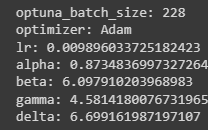

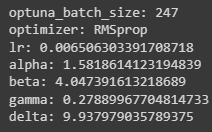![image.png](
  
)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_slice(study,params=['lr'])

In [ ]:
optuna.visualization.plot_intermediate_values(study)

[W 2023-02-27 06:05:43,305] You need to set up the pruning feature to utilize `plot_intermediate_values()`


In [ ]:
# #Model and Optmimizer
# model  = VAE(input_dim, hidden_dim, latent_dim).to(device)
# optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=l2_lambda)

# print(model)

In [ ]:
class ContrastiveLoss(nn.Module):
  def __init__(self, margin=1.0):
    super(ContrastiveLoss, self).__init__()
    self.margin = margin
        
  def forward(self, z_reparmeterized, labels):
    # Compute the pairwise euclidean distances between the examples in the latent space
    distances = torch.pow(z_reparmeterized, 2).sum(dim=1, keepdim=True) + torch.pow(z_reparmeterized, 2).sum(dim=1, keepdim=True).t() - 2 * torch.matmul(z_reparmeterized, z_reparmeterized.t())
    # Create a mask for the positive pairs (i.e. examples with the same label)
    positive_mask = labels.expand(z_reparmeterized.size(0), z_reparmeterized.size(0)).eq(labels.expand(z_reparmeterized.size(0), z_reparmeterized.size(0)).t())
    # Create a mask for the negative pairs (i.e. examples with different labels)
    negative_mask = labels.expand(z_reparmeterized.size(0), z_reparmeterized.size(0)).ne(labels.expand(z_reparmeterized.size(0), z_reparmeterized.size(0)).t())
    # Set the distances for the positive pairs to a large value
    distances.masked_fill_(positive_mask, 1e7)
    # Compute the contrastive loss as the sum of the max(0, margin - distance) for the negative pairs
    contrastive_loss = torch.sum(torch.max(torch.zeros_like(distances), self.margin - distances))
    return contrastive_loss


In [ ]:
class MagneticLoss(torch.nn.Module):
  def __init__(self, num_classes, strength, width):
      super().__init__()
      self.num_classes = num_classes
      self.strength = strength
      self.width = width     

  def forward(self, z, y):
    N = z.shape[0] # number of samples
    K = self.num_classes # number of classes
    mu = torch.stack([z[y.squeeze==k].mean(dim=0) for k in range(K)], dim=0) # mean of each class
    print(f"mu: {mu}")
    z_center = z[None, :, :] - mu[:, None, :] # centered z
    print(f"z_center: {z_center}")
    z_Norm = z_center.norm(dim=2) # L2 norm of z_Center
    print(f"z_Norm: {z_Norm}")
    exp_term = torch.exp(-self.width * z_Norm)
    pairwise_sum = (exp_term[:, :, None] * exp_term[None, :, :]).sum() - exp_term.sum()
    loss = 0.5 * self.strength * pairwise_sum / N / (K - 1)
    return loss

In [ ]:
# Loss Functions
loss_fn = nn.MSELoss(reduction="sum")
classifier_loss_fn = nn.CrossEntropyLoss()
triplet_loss_fn = nn.TripletMarginLoss(margin=1.0)
#triplet_loss_fn = TripletLoss(margin=1.0)

contrastive_loss_fn = ContrastiveLoss(margin=1)
magnetic_loss_fn = MagneticLoss(num_classes=num_classes, strength=1, width=1)

---
Train and Validation loop

In [ ]:
train_losses=[]
train_accuracy = []
accuracy_log = []
val_losses=[]
val_accuracy=[]

dic = dict(latent_space = list(), mu_list=list(), logsig2_list=list(), y=list())

from tensorboardX import SummaryWriter

# Create a SummaryWriter object
writer = SummaryWriter() 



for epoch in range(num_epochs):
  model.train()
  train_running_loss = 0
  

  z_list, means, logvars , labels_list = list(), list(), list(), list()

  for i, data in enumerate(train_loader):
    inputs, labels = data
    # print(f"Input shape: {inputs.shape}")
    # print(f"Labels shape: {labels.shape}")
    optimizer.zero_grad()
    
    x_reconstructed, z_reparmeterized, classified, mu, logvar = model(inputs)

    # Compute the reconstruction loss and KL divergence loss #################################################

    reconstruction_loss = loss_fn(x_reconstructed, inputs)
    kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    # Compute the contrastive loss #############################################################################
    contrastive_loss = contrastive_loss_fn(mu, labels)

    # Compute the classificaiton loss #########################################################################
    classified = classified.view(-1, 13)
    classification_loss = classifier_loss_fn(classified, labels.flatten())

    # Compute the triplet loss #########################
    # Select a random sample as the anchor, then select the positive samples (samples with the same label as the anchor)
    # and negative samples (samples with a different label than the anchor) from the mu
    batch_size = mu.size(0)
    # Select a random sample as the anchor
    anchor_index = torch.randint(0, batch_size, (1,))
    anchor_embeddings = mu[anchor_index].view(1, -1) # Take the embedding for the current sample
    anchor_embeddings = anchor_embeddings.expand(batch_size,-1)
    # Select a fixed number of positive samples
    positive_indices = torch.randint(0, batch_size, (batch_size,))
    positive_embeddings = mu[positive_indices].view(-1,latent_dim)
    # Select a fixed number of negative samples
    negative_indices = torch.randint(0, batch_size, (batch_size,))
    negative_embeddings = mu[negative_indices].view(-1,latent_dim)
    #print(f"anchor_embeddings shape: {anchor_embeddings.shape}, positive_embeddings shape: {positive_embeddings.shape}, negative_embeddings shape: {negative_embeddings.shape}")
    triplet_loss = triplet_loss_fn(anchor_embeddings, positive_embeddings, negative_embeddings)
   
    loss = (alpha*reconstruction_loss + kld_loss*beta) + gamma*classification_loss + delta*contrastive_loss #+ epsilon*triplet_loss

    accuracy = accuracy_score(labels, classified.argmax(dim=1))
    train_accuracy.append(accuracy)
    train_acc = sum(train_accuracy)/len(train_accuracy)
    accuracy_log.append(train_acc)

    loss.backward()
    optimizer.step()

    train_running_loss += loss.item()
    train_loss= train_running_loss/len(train_loader)

   # log for latent space visualziation (gif)...
    z_list.append(z_reparmeterized.detach())
    means.append(mu.detach())
    logvars.append(logvar.detach())
    labels_list.append(labels.detach())

   # Write the scalar values to TensorBoard
    writer.add_scalar('loss/total', loss.item(), i)
    writer.add_scalar('loss/reconstruction', reconstruction_loss.item(), i)
    writer.add_scalar('loss/kld', kld_loss.item(), i)
    writer.add_scalar('loss/classification', classification_loss.item(), i)

  writer.add_embedding(z_reparmeterized, metadata=labels, global_step=epoch)

  with torch.inference_mode():
    val_running_loss = 0
    val_running_acc = 0

    model.eval()
    # Iterate over the validation data
    for X, Y in val_loader:
      # Pass the data through the model and get the reconstructed data and the latent representation
      y_pred, z_reparmeterized, v_classified, mu, logvar = model(X)

      # Compute the reconstruction loss
      v_reconstruction_loss = loss_fn(y_pred, X)

      # Compute the KL divergence loss
      v_kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

      # Compute the contrastive loss
      v_contrastive_loss_value = contrastive_loss_fn(mu, Y)

      # Reshape the classified output to have the same shape as the labels
      v_classified = v_classified.view(-1, 13)
      # Compute the classification loss
      v_classification_loss = classifier_loss_fn(v_classified, Y.flatten())

      # Compute the total loss
      vloss = (alpha*v_reconstruction_loss + v_kld_loss*beta) + gamma*v_classification_loss + delta*v_contrastive_loss_value
      val_running_loss += vloss.item()
      val_loss = val_running_loss/len(val_loader)

      v_accuracy = accuracy_score(Y, v_classified.argmax(dim=1))
      val_accuracy.append(v_accuracy)
      val_acc = sum(val_accuracy)/len(val_accuracy)

  dic['latent_space'].append(torch.cat(z_list))
  dic['mu_list'].append(torch.cat(means))
  dic['logsig2_list'].append(torch.cat(logvars))
  dic['y'].append(torch.cat(labels_list))

  print(f"Epoch: {epoch+1} / {num_epochs} | Reconst_loss: {reconstruction_loss:.3f} | Kldiv loss: {kld_loss:.3f} | Classifcation loss: {classification_loss:.3f} | Constrast loss: {contrastive_loss:.2f} | Triplet loss: {triplet_loss:.3f} | Total loss: {train_loss:.3f} | Train acc: {train_acc*100:.3f} % ||| Val Loss: {val_loss:.3f} | Val acc: {val_acc*100:.3f} %")
  print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
  train_losses.append(train_loss)
  val_losses.append(val_loss)

# Close the SummaryWriter
writer.close()

NameError: ignored

In [ ]:
torch.save(model.state_dict(), 'VAE_Model.pt') # Save

---
Model Evaluations

In [ ]:
plt.plot(train_losses,'-o', label="Training loss")
plt.plot(val_losses,'-r',  label="Validation loss")
plt.xlabel('epoch')
plt.ylabel('losses')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

---
Latent Space Visualization

In [ ]:
print("Latent Space Visualization")
for i in range (num_epochs):
  fig = plt.figure(figsize=(12,12))
  z_arr = dic['latent_space'][i].cpu().numpy()
  y_arr = dic['y'][i].cpu().numpy()

  #Experiment 1
  plt.scatter(z_arr[:,0], z_arr[:,1], c = y_arr, edgecolor='none', alpha=0.5,
              cmap=plt.cm.get_cmap('gist_rainbow', num_classes))
  cb = plt.colorbar(ticks=[1,2,3,4,5,6,7,8,9,10,11,12],values=[1,2,3,4,5,6,7,8,9,10,11,12])
  #Experiment 3
  # plt.scatter(z_arr[:,0], z_arr[:,1], c = y_arr, edgecolor='none', alpha=0.5,
  #             cmap=plt.cm.get_cmap('hsv', 23))
  #cb = plt.colorbar(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],values=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
  cb.ax.tick_params(labelsize=10)
  # plt.xlim(-5, 5)
  # plt.ylim(-5, 5)
  plt.xticks(fontsize= 10)
  plt.yticks(fontsize= 10)
  plt.xlabel('z[0]', fontsize= 10)
  plt.ylabel('z[1]', fontsize= 10)
  plt.title(f'VAE train dataset with {input_dim} features| Acc: {train_acc*100:.1f}% | latent space Dim={latent_dim} | Epoch number: {i+1} ', fontsize= 12)
  # plt.show()
  plt.close()
  fig.savefig(f"/content/drive/MyDrive/WEAR_LAB/Research_Pytorch/VAE_Images/VAEtrain_images{i:001}" + ".png")
  print(f"Latent Space Image {i+1} stored.")
print()
print("Latent Space Gif being created...")
print()

import imageio
gif = []
for i in range(num_epochs):
  each_image = imageio.imread(f"/content/drive/MyDrive/WEAR_LAB/Research_Pytorch/VAE_Images/VAEtrain_images{i}" + ".png")# here read all images
  gif.append(each_image)
imageio.mimsave(f"/content/Latent_Space_and_Number_Features_{input_dim}.gif",gif)

from IPython.display import Image

fname = f'/content/Latent_Space_and_Number_Features_{input_dim}.gif'
Image(open(fname, 'rb').read())  # local

In [ ]:
%tensorboard --logdir=runs

---
Test
---

In [ ]:
import torch   
import torch.nn as nn                          
import torch.nn.functional as F                
import torch.optim as optim   
from torch.utils.data import TensorDataset, Dataset, DataLoader
from torch.autograd import Variable
import torch.utils.data

import pandas as pd 
import numpy as np
import os                             

import matplotlib.pyplot as plt
import seaborn as sns    

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

df = pd.read_csv("/content/drive/MyDrive/WEAR_LAB/Research_Pytorch/S1_E1_A1_v6.csv")

X = df.drop('stimulus', axis=1)
#y = df['stimulus']
y = df.iloc[:, 0:1]
print(X.shape, type(X), y.shape, type(y))
print()

from imblearn.under_sampling import RandomUnderSampler

sampling_strategy = "not minority"
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(X, y)

X = X_res.values
y = y_res.values
print(X.shape, type(X), y.shape, type(y))
print()

# Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

print(f"X_train size: {len(X_train)} | X_val size: {len(X_val)} | X_test size: {len(X_test)}")
print(f"y_train size: {len(y_train)} | y_val size: {len(y_val)} | y_test size: {len(y_test)}")
print()
print(f"Training Feature Split: {X_train.shape} | Training Labels { y_train.shape}")
print(f"Validation Feature Split: {X_val.shape} | Validation Labels { y_val.shape}")
print(f"Testing Feature Split: {X_test.shape} | Testing Labels { y_test.shape}")
print()

#Normalization Data 
Minmax = preprocessing.MinMaxScaler()
#Standardized = preprocessing.StandardScaler()
X_train_Minmax= Minmax.fit_transform(X_train)
X_val_Minmax = Minmax.transform(X_val)
X_test_Minmax = Minmax.transform(X_test)

#Convert to numpy then to torch 

X_train = torch.from_numpy(X_train_Minmax).float()
y_train = torch.from_numpy(y_train).long()

X_val = torch.from_numpy(X_val_Minmax).float()
y_val = torch.from_numpy(y_val).long()

X_test = torch.from_numpy(X_test_Minmax).float()
y_test = torch.from_numpy(y_test).long()

print(f"X_train: {type(X_train)} | y_train {type(y_train)}")
print(f"X_val: {type(X_val)} | y_train {type(y_val)}")
print(f"X_test: {type(X_test)} | y_test {type(y_test)}")
print()
print(f"Training: {X_train.shape} , { y_train.shape}")
print(f"Validation: {X_val.shape} , { y_val.shape}")
print(f"Testing:  {X_test.shape} , { y_test.shape}")
print()

class ClassifierDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data

    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]

    def __len__ (self):
        return len(self.X_data)

training = ClassifierDataset(X_train, y_train)
validating = ClassifierDataset(X_val, y_val)
testing = ClassifierDataset(X_test, y_test)

##########################################################################################################################################################################################################
#Hyperparameters
latent_dim = 2
input_dim= 19
hidden_dim= 9
output_dim = 19
num_classes = 13

num_epochs= 70
batch_size= 100
learning_rate= 0.001 #3e-4 #Karpathy constant


#beta = 1
beta = 0.005
alpha = 1
#############################################################################################################################################################################################################

train_loader = DataLoader(training, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(validating, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(testing, batch_size=batch_size, shuffle=False)


class VAE(nn.Module):  
  def __init__(self, input_dim, hidden_dim, latent_dim):
    super(VAE,self).__init__()  
    self.fc1 = nn.Linear(input_dim, hidden_dim)  # no labels
    self.mu = nn.Linear(hidden_dim, latent_dim)   # mu
    self.logvar = nn.Linear(hidden_dim,latent_dim)   # log-var

    self.fc3 = nn.Linear(latent_dim, hidden_dim) 
    self.fc4 = nn.Linear(hidden_dim, input_dim)
    
    self.classifier = nn.Sequential(
        nn.Linear(latent_dim, 13),
        nn.Sigmoid(),
        nn.Softmax(dim=1)
    )

  def encode(self, x):     
#    print(f'encoder {type(x)}')         
    z = F.relu(self.fc1(x))
    z = torch.tanh(z) 
    z1 = self.mu(z)               
    z2 = self.logvar(z) 
    return z1, z2                 # (mu, log-var)

  def decode(self, x):
#    print(f'decoder {type(x)}')
    z = F.relu(self.fc3(x))                    
    z = torch.sigmoid(self.fc4(z))      # in [0, 1]
    #print(f"z: {z}")
    return z 

  def forward(self, x):
#    print(f'forward {type(x)}')

#  Reparamaterize
    mu, logvar = self.encode(x)
    stdev = torch.exp(0.5 * logvar)
    esp = torch.randn_like(stdev)
    z_reparmeterized = mu + (esp * stdev)   
    #print(f"z_reparmeterized : {z_reparmeterized}")      
    x_reconstructed = self.decode(z_reparmeterized)
    #print(f"x_reconstructed : {x_reconstructed}")

    classified = self.classifier(z_reparmeterized)

    return (x_reconstructed, z_reparmeterized, classified, mu, logvar)

model  = VAE(input_dim, hidden_dim, latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

print(model)
loss_fn = nn.MSELoss(reduction="sum")
classifier_loss_fn = nn.CrossEntropyLoss()

train_losses=[]
train_accuracy = []
val_losses=[]

dic = dict(latent_space = list(), mu_list=list(), logsig2_list=list(), y=list())
for epoch in range(num_epochs):
  model.train()
  train_running_loss = 0

  z_list, means, logvars , labels_list = list(), list(), list(), list()

  for i, data in enumerate(train_loader):
    inputs, labels = data

    optimizer.zero_grad()

    x_reconstructed, z_reparmeterized, classified, mu, logvar = model(inputs)

    reconstruction_loss = loss_fn(x_reconstructed, inputs)
    kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    classified = classified.view(-1, 13)
    classification_loss = classifier_loss_fn(classified, labels.flatten())

    loss = (alpha*reconstruction_loss + kld_loss*beta) + classification_loss

    # correct = torch.eq(classified.argmax(dim=1), labels).float()
    # classifcaiton_accuracy = correct.mean()

    # Calculate classification accuracy
    _, predicted = torch.max(classified, 1)
    correct = (predicted == labels.flatten()).sum().item()
    classifcaiton_accuracy = correct / len(predicted)



    loss.backward()
    optimizer.step()

    train_running_loss += loss.item()
    train_loss= train_running_loss/len(train_loader)

   # log ...
    z_list.append(z_reparmeterized.detach())
    means.append(mu.detach())
    logvars.append(logvar.detach())
    labels_list.append(labels.detach())

  with torch.inference_mode():
    val_running_loss = 0

    model.eval()
    for X, Y in val_loader:
      y_pred, z_reparmeterized, v_classified, mu, logvar = model(X)
      v_reconstruction_loss = loss_fn(y_pred, X)
      v_kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

      v_classified = v_classified.view(-1, 13)
      v_classification_loss = classifier_loss_fn(v_classified, Y.flatten())

      vloss = (alpha*reconstruction_loss + kld_loss*beta) + v_classification_loss

      val_running_loss += vloss.item()
      val_loss = val_running_loss/len(val_loader)


  dic['latent_space'].append(torch.cat(z_list))
  dic['mu_list'].append(torch.cat(means))
  dic['logsig2_list'].append(torch.cat(logvars))
  dic['y'].append(torch.cat(labels_list))

  print(f"Epoch: {epoch+1} / {num_epochs} | reconst_loss: {reconstruction_loss:.3f} | kldiv loss: {kld_loss:.5f} | classifcation loss: {classification_loss:.5f} | total loss: {train_loss:.3f} | train acc: {classifcaiton_accuracy:.3f} ||| Val Loss: {val_loss:.3f} | val acc: {val_acc:.3f}")
  print("------------------------------------------------------------------------------------------------------------------")
  #print(f"Epoch: {epoch+1} / {num_epochs} | reconst_loss: {v_reconstruction_loss:.3f} | kldiv loss: {v_kld_loss:.3f} | Val Loss: {val_loss:.3f}")
  train_losses.append(train_loss)
  val_losses.append(val_loss)

(130200, 19) <class 'pandas.core.frame.DataFrame'> (130200, 1) <class 'pandas.core.frame.DataFrame'>

(85969, 19) <class 'numpy.ndarray'> (85969, 1) <class 'numpy.ndarray'>

X_train size: 51581 | X_val size: 17194 | X_test size: 17194
y_train size: 51581 | y_val size: 17194 | y_test size: 17194

Training Feature Split: (51581, 19) | Training Labels (51581, 1)
Validation Feature Split: (17194, 19) | Validation Labels (17194, 1)
Testing Feature Split: (17194, 19) | Testing Labels (17194, 1)

X_train: <class 'torch.Tensor'> | y_train <class 'torch.Tensor'>
X_val: <class 'torch.Tensor'> | y_train <class 'torch.Tensor'>
X_test: <class 'torch.Tensor'> | y_test <class 'torch.Tensor'>

Training: torch.Size([51581, 19]) , torch.Size([51581, 1])
Validation: torch.Size([17194, 19]) , torch.Size([17194, 1])
Testing:  torch.Size([17194, 19]) , torch.Size([17194, 1])

VAE(
  (fc1): Linear(in_features=19, out_features=9, bias=True)
  (mu): Linear(in_features=9, out_features=2, bias=True)
  (logvar): 

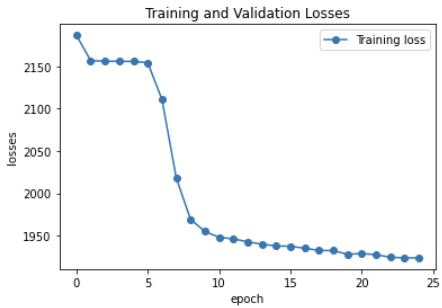